### Party-wise Analysis (Liberal Party)


In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Yathin Muthavarapu\Desktop\Capstone-2/liberal_df.csv')
print(df.head())

     party                                                url  \
0  liberal  https://www.liberal.ca/gender-equality-week-st...   
1  liberal  https://www.liberal.ca/justin-trudeau-and-soph...   
2  liberal  https://www.liberal.ca/justin-trudeau-joins-su...   
3  liberal  https://www.liberal.ca/liberals-nominate-rache...   
4  liberal  https://www.liberal.ca/justin-trudeau-joins-su...   

                                             content        date  
0  \n\nShare\n\n\n\n\n\nToday, the Leader of the ...  2019-09-22  
1  \n\nShare\n\n\n\n\n\nSaguenay, QC – Justin Tru...  2018-06-13  
2  \n\nShare\n\n\n\n\n\nCobourg, ON – Justin Trud...  2018-10-18  
3  \n\nShare\n\n\n\n\n\nOutremont, QC- Local Libe...  2018-12-16  
4  \n\nShare\n\n\n\n\n\nOttawa, ON – Justin Trude...  2019-09-09  


In [3]:
df.shape

(200, 4)

In [4]:
import re

def clean_text(text):
    # Remove extra whitespace
    text = ' '.join(text.split())

    # Remove non-alphanumeric characters (except spaces)
    text = re.sub(r'[^\w\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    return text

df['cleaned_content'] = df['content'].astype(str).apply(clean_text)

print(df.head())

     party                                                url  \
0  liberal  https://www.liberal.ca/gender-equality-week-st...   
1  liberal  https://www.liberal.ca/justin-trudeau-and-soph...   
2  liberal  https://www.liberal.ca/justin-trudeau-joins-su...   
3  liberal  https://www.liberal.ca/liberals-nominate-rache...   
4  liberal  https://www.liberal.ca/justin-trudeau-joins-su...   

                                             content        date  \
0  \n\nShare\n\n\n\n\n\nToday, the Leader of the ...  2019-09-22   
1  \n\nShare\n\n\n\n\n\nSaguenay, QC – Justin Tru...  2018-06-13   
2  \n\nShare\n\n\n\n\n\nCobourg, ON – Justin Trud...  2018-10-18   
3  \n\nShare\n\n\n\n\n\nOutremont, QC- Local Libe...  2018-12-16   
4  \n\nShare\n\n\n\n\n\nOttawa, ON – Justin Trude...  2019-09-09   

                                     cleaned_content  
0  share today the leader of the liberal party of...  
1  share saguenay qc  justin trudeau leader of th...  
2  share cobourg on  justin trudeau

## Overall Sentiment Distribution

In [6]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
df['sentiment_scores'] = df['cleaned_content'].apply(lambda x: sia.polarity_scores(x))
df['compound_sentiment'] = df['sentiment_scores'].apply(lambda x: x['compound'])

def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['compound_sentiment'].apply(categorize_sentiment)

sentiment_distribution = df['sentiment_category'].value_counts(normalize=True)
print("Overall Sentiment Distribution:")
print(sentiment_distribution)

average_sentiment = df['compound_sentiment'].mean()
print(f"\nAverage Sentiment Score: {average_sentiment:.2f}")

[nltk_data] Downloading package vader_lexicon to C:\Users\Yathin
[nltk_data]     Muthavarapu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Overall Sentiment Distribution:
sentiment_category
Positive    0.94
Negative    0.06
Name: proportion, dtype: float64

Average Sentiment Score: 0.85


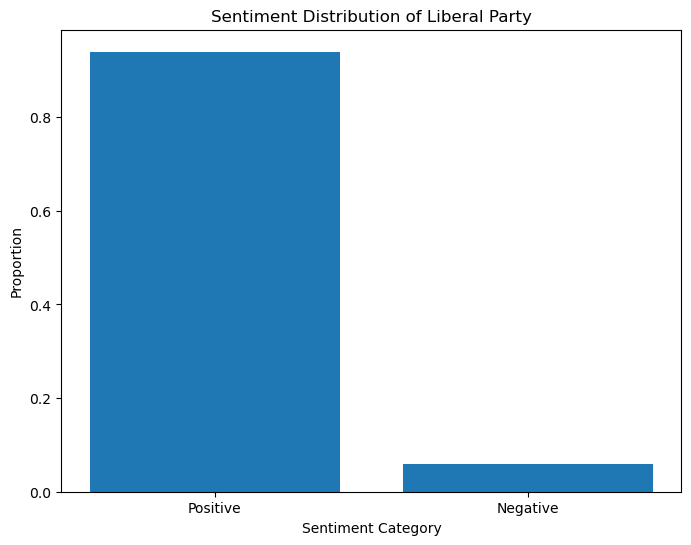

In [7]:
import matplotlib.pyplot as plt

# Assuming sentiment_distribution is already calculated as in your provided code.
sentiment_distribution = df['sentiment_category'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
plt.bar(sentiment_distribution.index, sentiment_distribution.values)
plt.title('Sentiment Distribution of Liberal Party')
plt.xlabel('Sentiment Category')
plt.ylabel('Proportion')
plt.show()

## Temporal Sentiment Analysis

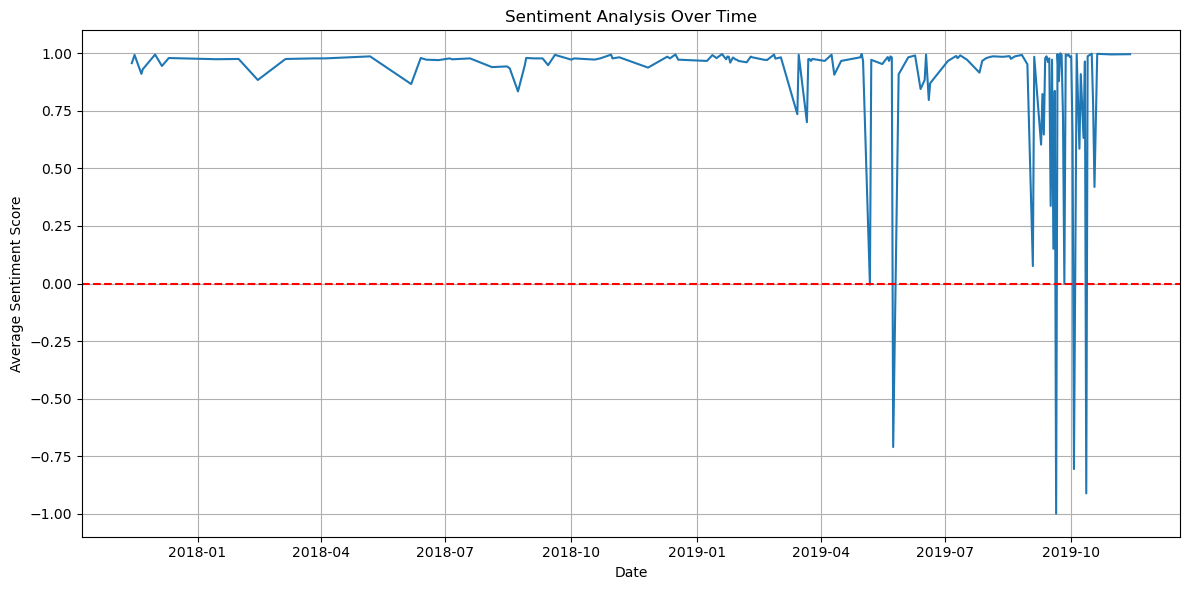

In [9]:
import matplotlib.pyplot as plt

# Convert date to datetime if not already
df['date'] = pd.to_datetime(df['date'])

# Apply sentiment analysis if not already done
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['content'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Group by date and calculate average sentiment
daily_sentiment = df.groupby('date')['sentiment_score'].mean().reset_index()

# Plot the sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(daily_sentiment['date'], daily_sentiment['sentiment_score'])
plt.title('Sentiment Analysis Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.grid(True)
plt.tight_layout()
plt.show()

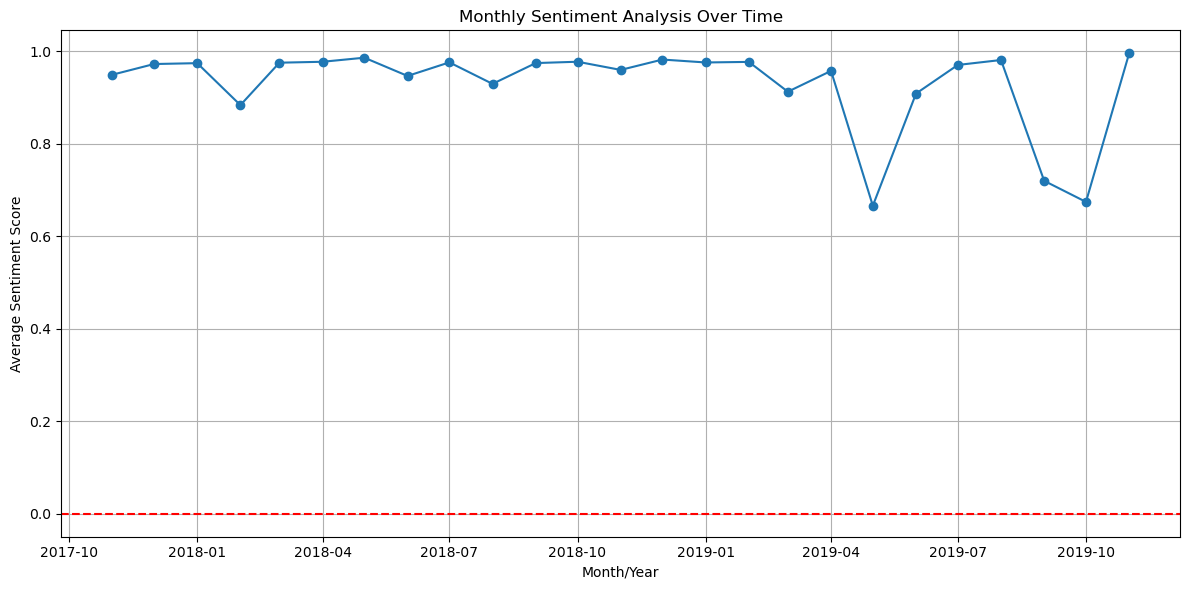

In [10]:
# Create a new column for month/year
df['month_year'] = df['date'].dt.to_period('M')

# Group by month/year and calculate average sentiment
monthly_sentiment = df.groupby('month_year')['sentiment_score'].mean().reset_index()

# Convert month_year back to datetime for plotting
monthly_sentiment['month_year'] = monthly_sentiment['month_year'].dt.to_timestamp()

# Plot the sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sentiment['month_year'], monthly_sentiment['sentiment_score'], marker='o')
plt.title('Monthly Sentiment Analysis Over Time')
plt.xlabel('Month/Year')
plt.ylabel('Average Sentiment Score')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.grid(True)
plt.tight_layout()
plt.show()

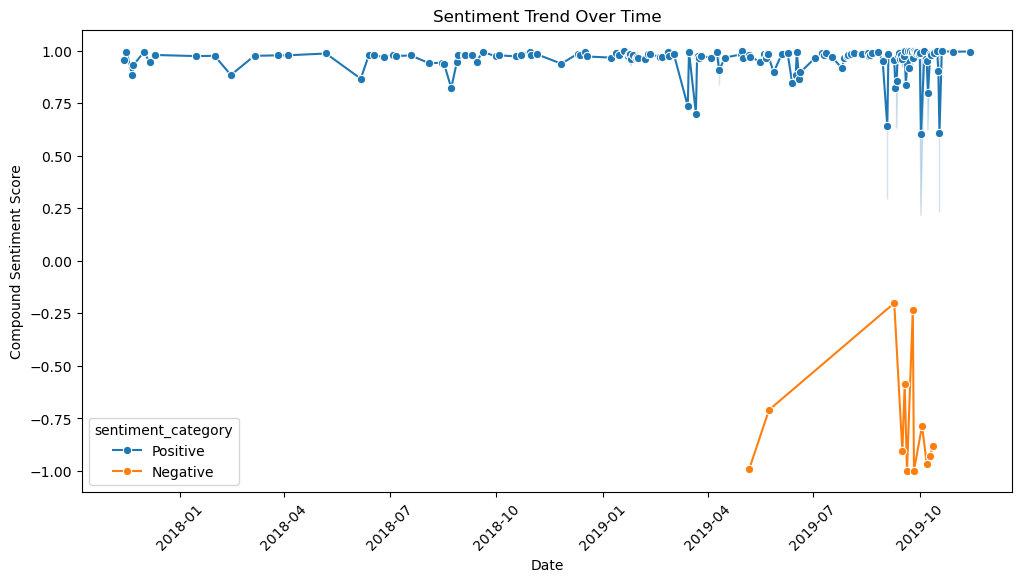

In [11]:
import seaborn as sns

# Line Chart: Sentiment Over Time
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='compound_sentiment', data=df, marker='o', hue='sentiment_category')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment Score')
plt.xticks(rotation=45)
plt.show()

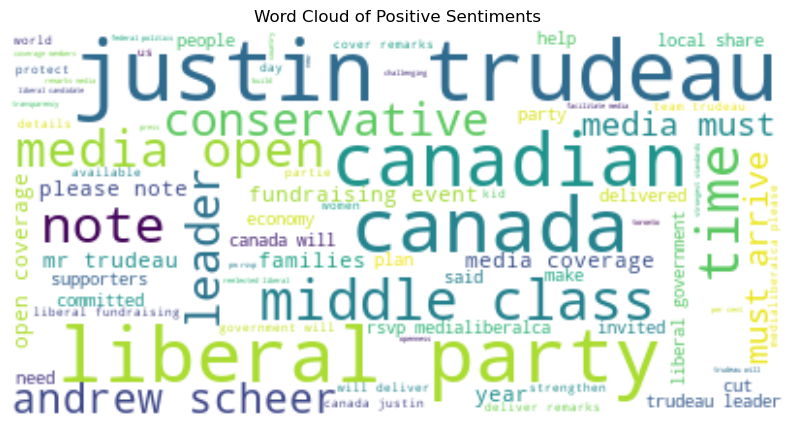

In [12]:
from wordcloud import WordCloud

# Word Cloud: Positive Sentiments
positive_text = " ".join(content for content in df[df['sentiment_category'] == 'Positive']['cleaned_content'])

wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='steelblue').generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Positive Sentiments')
plt.axis('off')
plt.show()

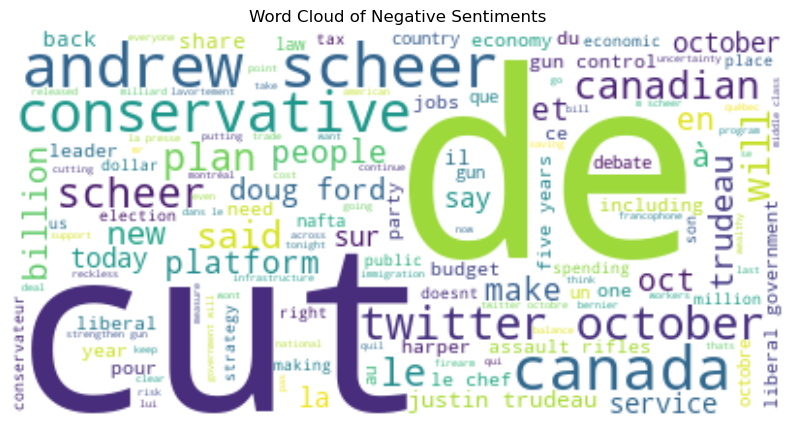

In [13]:
# Word Cloud: Negative Sentiments
negative_text = " ".join(content for content in df[df['sentiment_category'] == 'Negative']['cleaned_content'])

wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='firebrick').generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Negative Sentiments')
plt.axis('off')
plt.show()

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the cleaned text data
X = vectorizer.fit_transform(df['cleaned_content'])

In [15]:
from sklearn.model_selection import train_test_split

# Assuming you have a 'Sentiment' column with labels
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment_category'], test_size=0.2, random_state=42)

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# Support Vector Machine
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
    Positive       0.90      1.00      0.95        36

    accuracy                           0.90        40
   macro avg       0.45      0.50      0.47        40
weighted avg       0.81      0.90      0.85        40



C:\Users\Yathin Muthavarapu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Yathin Muthavarapu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Yathin Muthavarapu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
    Positive       0.90      1.00      0.95        36

    accuracy                           0.90        40
   macro avg       0.45      0.50      0.47        40
weighted avg       0.81      0.90      0.85        40



C:\Users\Yathin Muthavarapu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Yathin Muthavarapu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Yathin Muthavarapu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Sentiment Analysis (3 party data combined)


In [19]:
df1 = pd.read_csv('liberal_df.csv')
df2=pd.read_csv('ndp_df.csv')
df3=pd.read_csv('conservatives_df.csv')

In [20]:
# Assuming df, df2, and df3 are already defined as in your provided code
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

print(combined_df.head())
combined_df.shape

     party                                                url  \
0  liberal  https://www.liberal.ca/gender-equality-week-st...   
1  liberal  https://www.liberal.ca/justin-trudeau-and-soph...   
2  liberal  https://www.liberal.ca/justin-trudeau-joins-su...   
3  liberal  https://www.liberal.ca/liberals-nominate-rache...   
4  liberal  https://www.liberal.ca/justin-trudeau-joins-su...   

                                             content        date  
0  \n\nShare\n\n\n\n\n\nToday, the Leader of the ...  2019-09-22  
1  \n\nShare\n\n\n\n\n\nSaguenay, QC – Justin Tru...  2018-06-13  
2  \n\nShare\n\n\n\n\n\nCobourg, ON – Justin Trud...  2018-10-18  
3  \n\nShare\n\n\n\n\n\nOutremont, QC- Local Libe...  2018-12-16  
4  \n\nShare\n\n\n\n\n\nOttawa, ON – Justin Trude...  2019-09-09  


(502, 4)

In [21]:

def clean_text(text):
    # Remove extra whitespace
    text = ' '.join(text.split())

    # Remove non-alphanumeric characters (except spaces)
    text = re.sub(r'[^\w\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    return text

combined_df['cleaned_content'] = combined_df['content'].astype(str).apply(clean_text)

print(combined_df.head())

     party                                                url  \
0  liberal  https://www.liberal.ca/gender-equality-week-st...   
1  liberal  https://www.liberal.ca/justin-trudeau-and-soph...   
2  liberal  https://www.liberal.ca/justin-trudeau-joins-su...   
3  liberal  https://www.liberal.ca/liberals-nominate-rache...   
4  liberal  https://www.liberal.ca/justin-trudeau-joins-su...   

                                             content        date  \
0  \n\nShare\n\n\n\n\n\nToday, the Leader of the ...  2019-09-22   
1  \n\nShare\n\n\n\n\n\nSaguenay, QC – Justin Tru...  2018-06-13   
2  \n\nShare\n\n\n\n\n\nCobourg, ON – Justin Trud...  2018-10-18   
3  \n\nShare\n\n\n\n\n\nOutremont, QC- Local Libe...  2018-12-16   
4  \n\nShare\n\n\n\n\n\nOttawa, ON – Justin Trude...  2019-09-09   

                                     cleaned_content  
0  share today the leader of the liberal party of...  
1  share saguenay qc  justin trudeau leader of th...  
2  share cobourg on  justin trudeau

In [22]:
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
combined_df['sentiment_scores'] = combined_df['cleaned_content'].apply(lambda x: sia.polarity_scores(x))
combined_df['compound_sentiment'] = combined_df['sentiment_scores'].apply(lambda x: x['compound'])

def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

combined_df['sentiment_category'] = combined_df['compound_sentiment'].apply(categorize_sentiment)

sentiment_distribution = combined_df['sentiment_category'].value_counts(normalize=True)
print("Overall Sentiment Distribution:")
print(sentiment_distribution)

average_sentiment = combined_df['compound_sentiment'].mean()
print(f"\nAverage Sentiment Score: {average_sentiment:.2f}")

[nltk_data] Downloading package vader_lexicon to C:\Users\Yathin
[nltk_data]     Muthavarapu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Overall Sentiment Distribution:
sentiment_category
Positive    0.834661
Negative    0.163347
Neutral     0.001992
Name: proportion, dtype: float64

Average Sentiment Score: 0.64


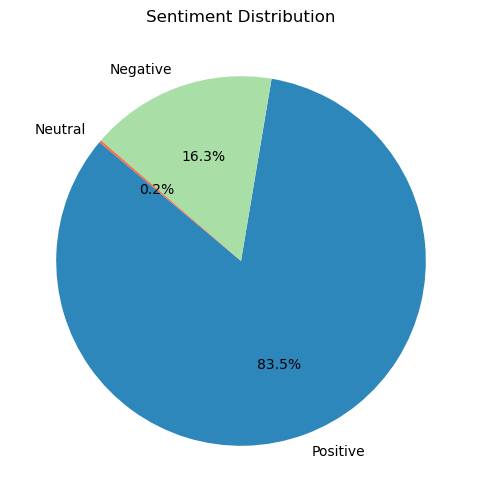

In [23]:
# Pie Chart: Sentiment Distribution
sentiment_counts = combined_df['sentiment_category'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#2D87BB', '#AADEA7', '#F66D44'])
plt.title('Sentiment Distribution')
plt.show()

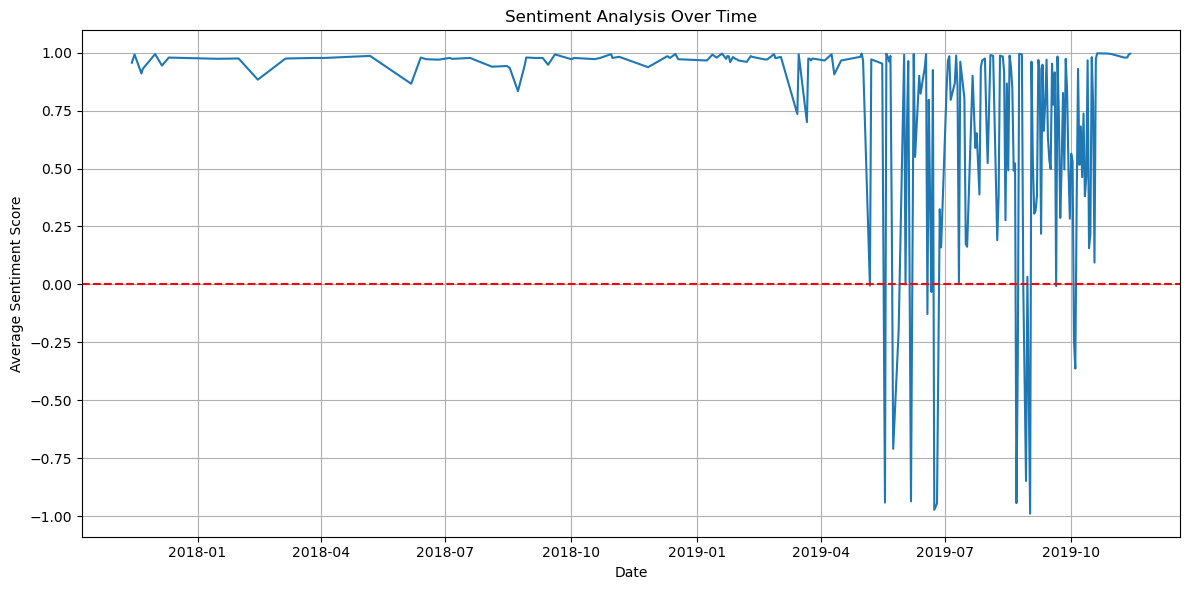

In [24]:
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Apply sentiment analysis if not already done
sia = SentimentIntensityAnalyzer()
combined_df['sentiment_score'] = combined_df['content'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Group by date and calculate average sentiment
daily_sentiment = combined_df.groupby('date')['sentiment_score'].mean().reset_index()

# Plot the sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(daily_sentiment['date'], daily_sentiment['sentiment_score'])
plt.title('Sentiment Analysis Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.grid(True)
plt.tight_layout()
plt.show()

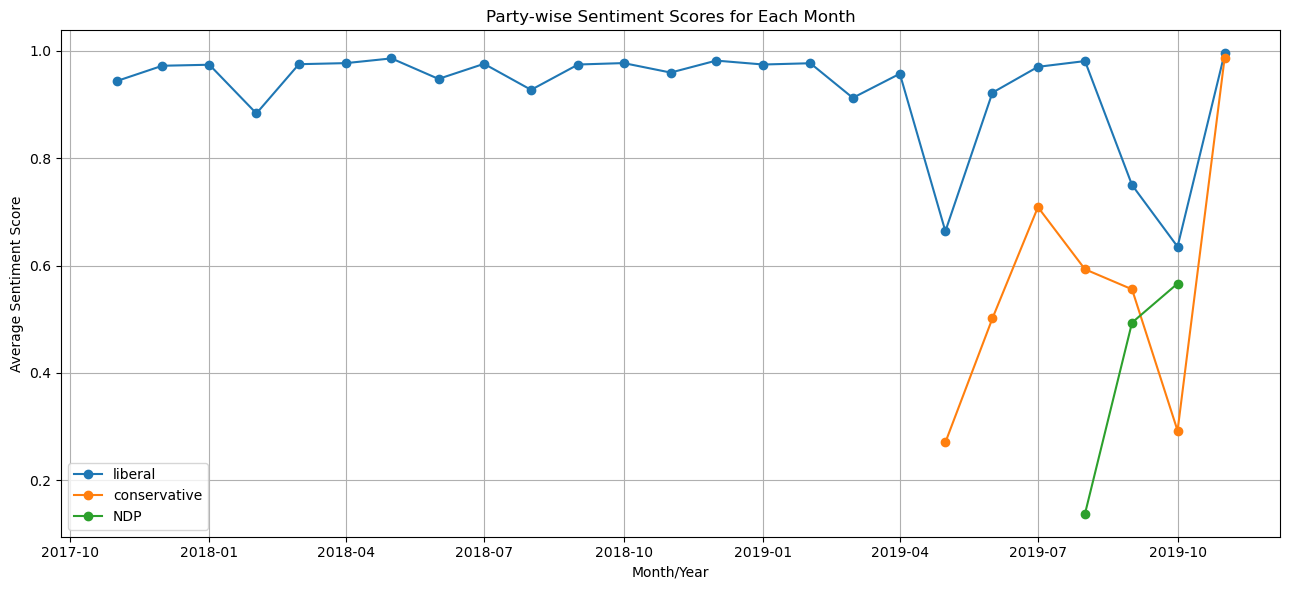

In [25]:
# Group by month, year, and party, then calculate the average sentiment score
monthly_party_sentiment = combined_df.groupby([combined_df['date'].dt.to_period('M'), 'party'])['compound_sentiment'].mean().reset_index()

# Rename the month/year column for clarity
monthly_party_sentiment.rename(columns={'date': 'month_year'}, inplace=True)

# Convert the month_year back to datetime for plotting (optional, but can be useful)
monthly_party_sentiment['month_year'] = monthly_party_sentiment['month_year'].dt.to_timestamp()

# Create the plot
plt.figure(figsize=(13, 6))
for party in monthly_party_sentiment['party'].unique():
    party_data = monthly_party_sentiment[monthly_party_sentiment['party'] == party]
    plt.plot(party_data['month_year'], party_data['compound_sentiment'], label=party, marker='o')

plt.title('Party-wise Sentiment Scores for Each Month')
plt.xlabel('Month/Year')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


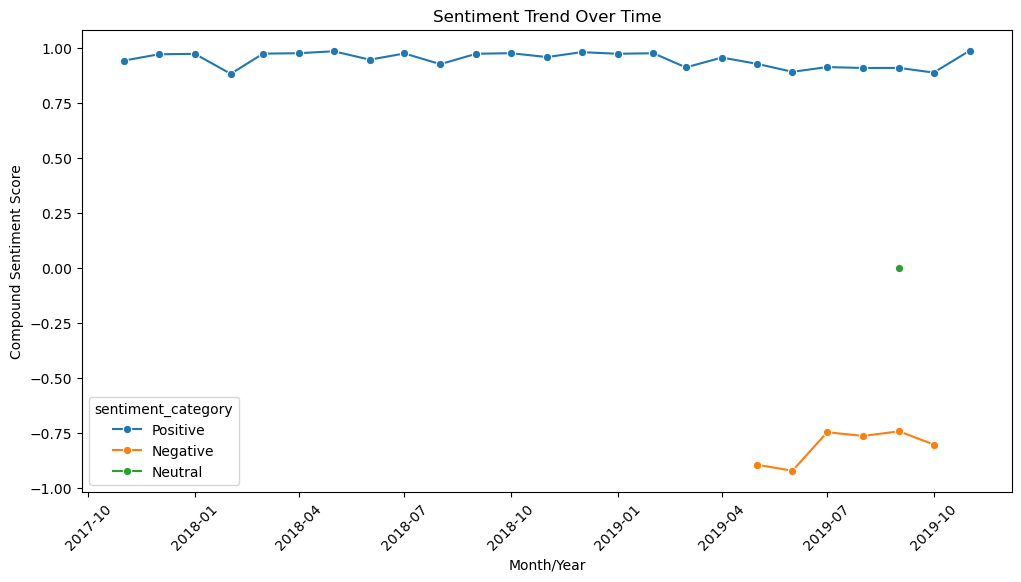

In [26]:
monthly_sentiment = combined_df.groupby([combined_df['date'].dt.to_period('M'), 'sentiment_category'])['compound_sentiment'].mean().reset_index()

# Rename the month/year column for clarity
monthly_sentiment.rename(columns={'date': 'month_year'}, inplace=True)

# Convert the month_year back to datetime for plotting (This is a Period object, so to_timestamp() can be called)
monthly_sentiment['month_year'] = monthly_sentiment['month_year'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
#Line plot
sns.lineplot(x='month_year', y='compound_sentiment', data=monthly_sentiment, marker='o', hue='sentiment_category')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Month/Year')
plt.ylabel('Compound Sentiment Score')
plt.xticks(rotation=45)
plt.show()

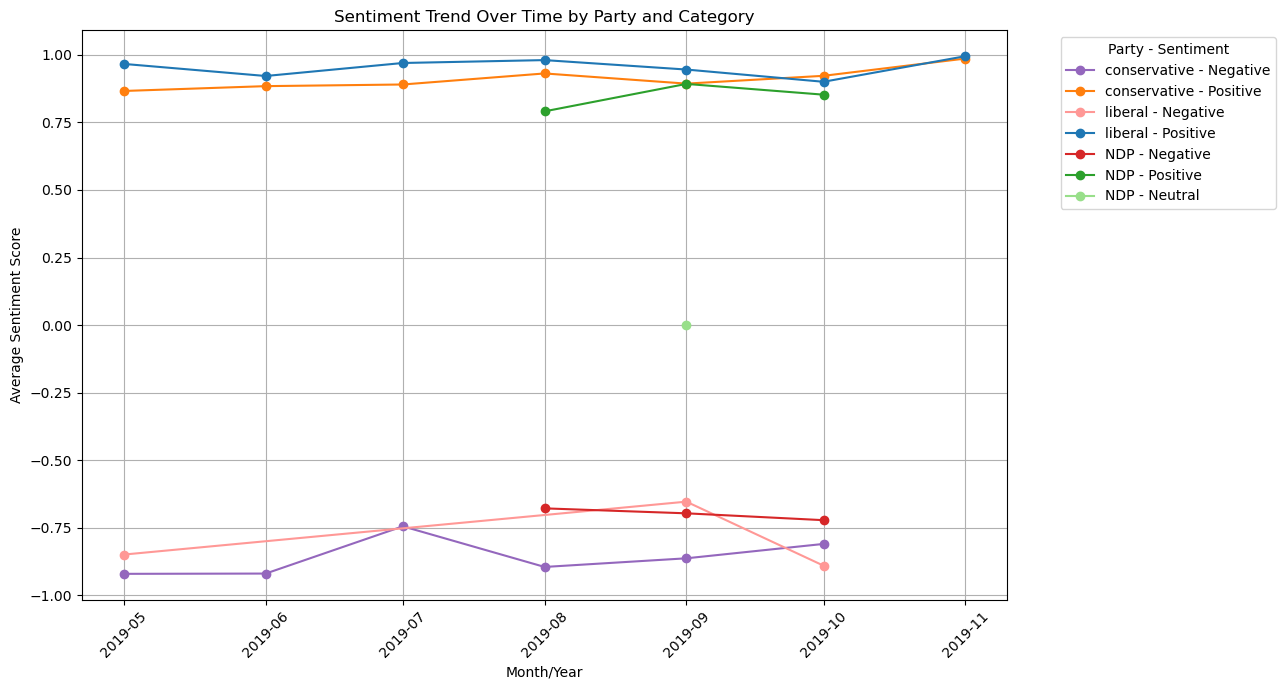

In [27]:
# Filter data for May 2019 to November 2019
start_date = pd.to_datetime('2019-05-01')
end_date = pd.to_datetime('2019-11-30')
filtered_df = combined_df[(combined_df['date'] >= start_date) & (combined_df['date'] <= end_date)]

monthly_party_sentiment = filtered_df.groupby([
    filtered_df['date'].dt.to_period('M'),
    'party',
    'sentiment_category'
])['compound_sentiment'].mean().reset_index()

# Rename the month/year column
monthly_party_sentiment.rename(columns={'date': 'month_year'}, inplace=True)

# Convert the month_year back to datetime for plotting
monthly_party_sentiment['month_year'] = monthly_party_sentiment['month_year'].dt.to_timestamp()

# Create a custom color palette with correct party names
# Replace 'Party1', 'Party2', 'Party3' with actual party names from the data
color_palette = {
    'liberal': {'Positive': '#1f77b4', 'Negative': '#ff9896'},
    'NDP': {'Positive': '#2ca02c', 'Neutral': '#98df8a', 'Negative': '#d62728'},
    'conservative': {'Positive': '#ff7f0e', 'Negative': '#9467bd'}
}

# Create the plot
plt.figure(figsize=(13, 7))

for party in monthly_party_sentiment['party'].unique():
    party_data = monthly_party_sentiment[monthly_party_sentiment['party'] == party]
    for sentiment in party_data['sentiment_category'].unique():
        sentiment_data = party_data[party_data['sentiment_category'] == sentiment]
        plt.plot(sentiment_data['month_year'], sentiment_data['compound_sentiment'],
                 color=color_palette[party][sentiment],
                 marker='o', linestyle='-',
                 label=f"{party} - {sentiment}")

plt.title('Sentiment Trend Over Time by Party and Category')
plt.xlabel('Month/Year')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.legend(title='Party - Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

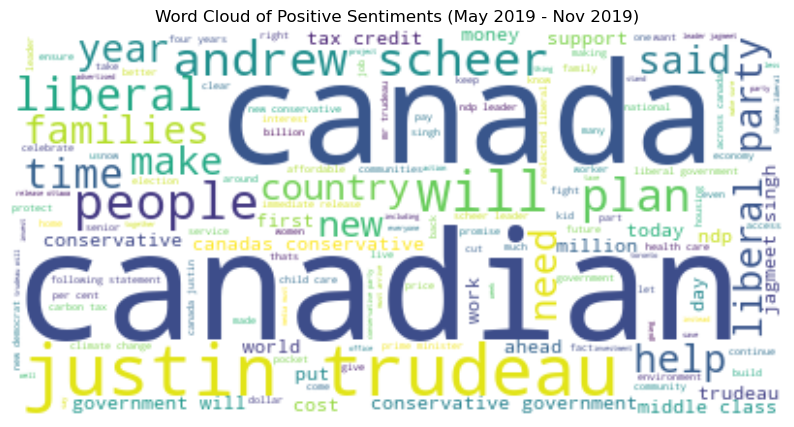

In [28]:
# Filter data for May 2019 to November 2019
start_date = pd.to_datetime('2019-05-01')
end_date = pd.to_datetime('2019-11-30')
filtered_df = combined_df[(combined_df['date'] >= start_date) & (combined_df['date'] <= end_date)]

# Create the positive word cloud
positive_text = " ".join(content for content in filtered_df[filtered_df['sentiment_category'] == 'Positive']['cleaned_content'])

wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='steelblue').generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Positive Sentiments (May 2019 - Nov 2019)')
plt.axis('off')
plt.show()


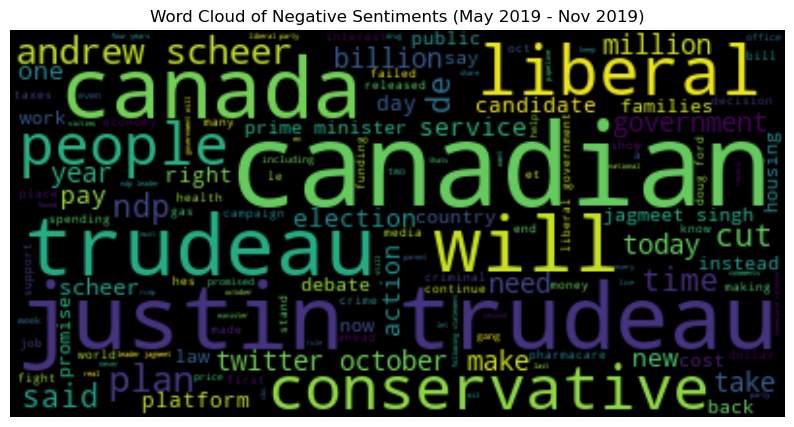

In [29]:
# Word Cloud: Negative Sentiments (May 2019 - Nov 2019)
negative_text = " ".join(content for content in filtered_df[filtered_df['sentiment_category'] == 'Negative']['cleaned_content'])

wordcloud = WordCloud(background_color='black', max_words=200, contour_width=3, contour_color='firebrick').generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Negative Sentiments (May 2019 - Nov 2019)')
plt.axis('off')
plt.show()

###  Word Frequency Analysis


[nltk_data] Downloading package stopwords to C:\Users\Yathin
[nltk_data]     Muthavarapu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


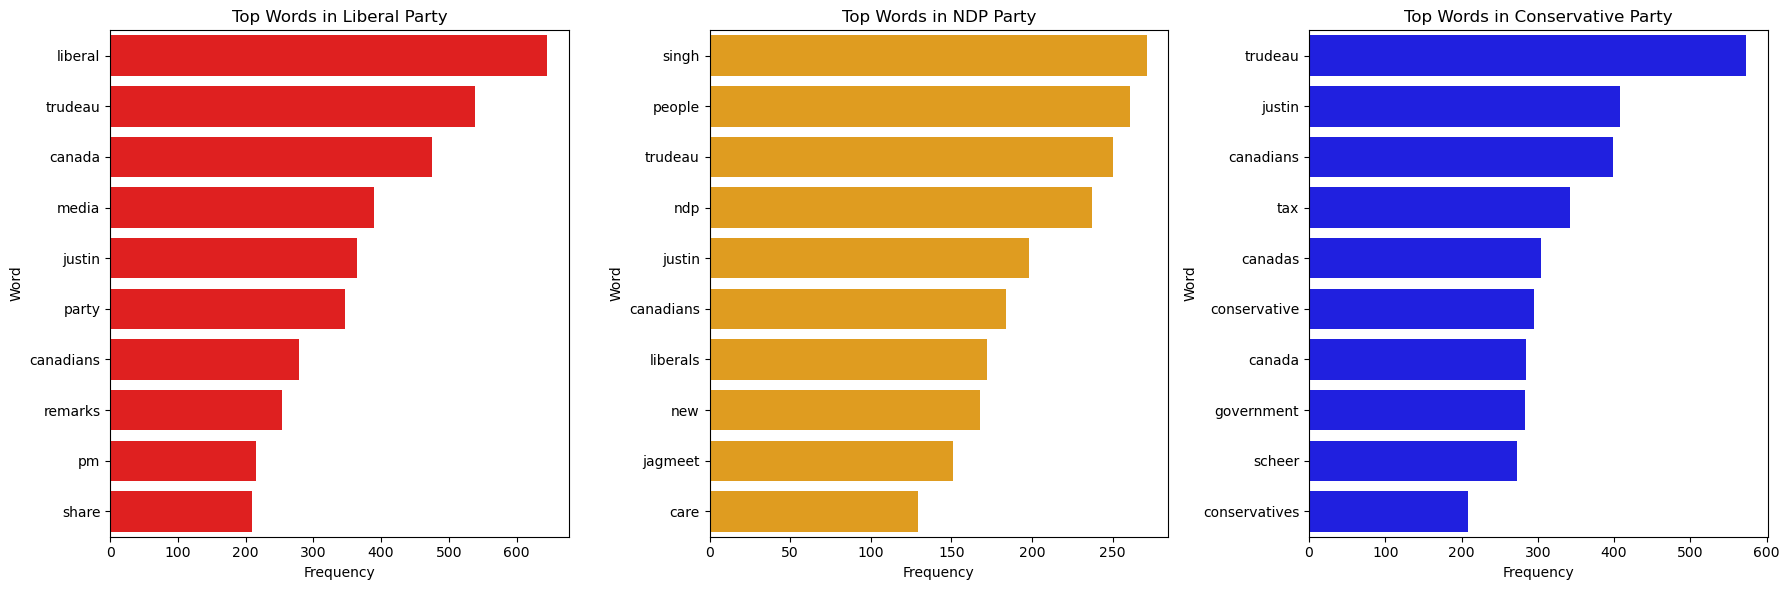

In [31]:

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re

# Ensure stopwords are downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove special characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())
    # Tokenize and remove stopwords
    words = [word for word in text.split() if word not in stop_words]
    return words

# Apply preprocessing
df1['cleaned_words'] = df1['content'].apply(preprocess_text)
df2['cleaned_words'] = df2['content'].apply(preprocess_text)
df3['cleaned_words'] = df3['content'].apply(preprocess_text)

# Flatten word lists for each dataset
words_df1 = [word for sublist in df1['cleaned_words'] for word in sublist]
words_df2 = [word for sublist in df2['cleaned_words'] for word in sublist]
words_df3 = [word for sublist in df3['cleaned_words'] for word in sublist]

# Count word frequencies
word_freq_df1 = Counter(words_df1).most_common(10)
word_freq_df2 = Counter(words_df2).most_common(10)
word_freq_df3 = Counter(words_df3).most_common(10)

# Convert to DataFrame
word_freq_df1 = pd.DataFrame(word_freq_df1, columns=['Word', 'Frequency'])
word_freq_df2 = pd.DataFrame(word_freq_df2, columns=['Word', 'Frequency'])
word_freq_df3 = pd.DataFrame(word_freq_df3, columns=['Word', 'Frequency'])

# Plot word frequencies
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df1, ax=axes[0], color='red')
axes[0].set_title('Top Words in Liberal Party')
sns.barplot(x='Frequency', y='Word', data=word_freq_df2, ax=axes[1], color='orange')
axes[1].set_title('Top Words in NDP Party')
sns.barplot(x='Frequency', y='Word', data=word_freq_df3, ax=axes[2], color='blue')
axes[2].set_title('Top Words in Conservative Party')

plt.tight_layout()
plt.show()

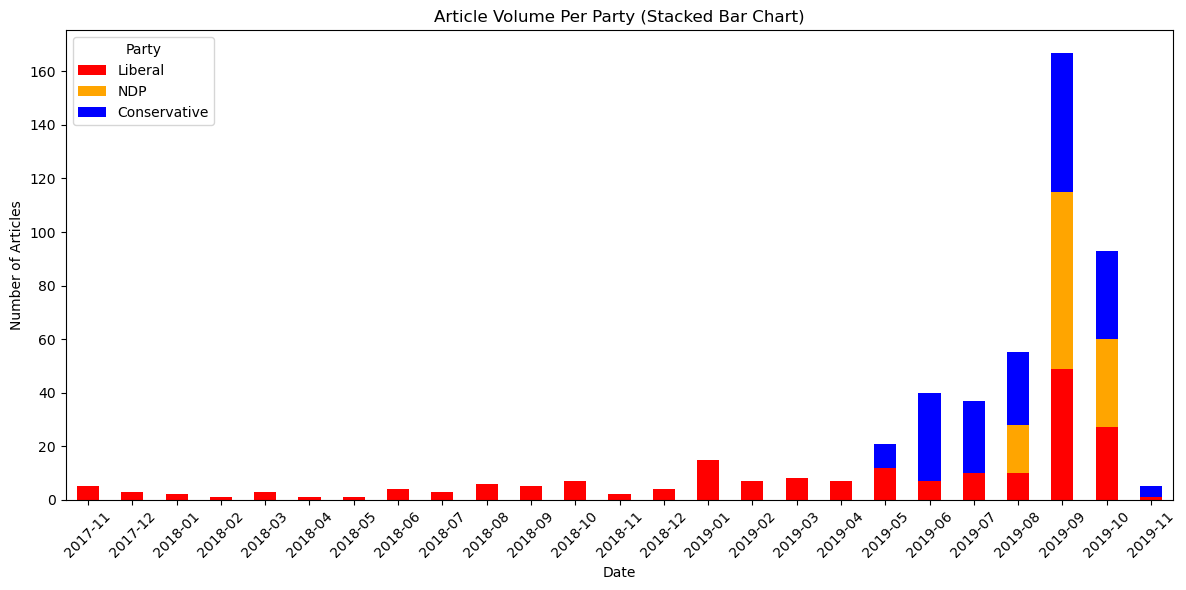

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure date column is in datetime format
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')
df2['date'] = pd.to_datetime(df2['date'], errors='coerce')
df3['date'] = pd.to_datetime(df3['date'], errors='coerce')

# Extract year and month for grouping
df1['year_month'] = df1['date'].dt.to_period('M')
df2['year_month'] = df2['date'].dt.to_period('M')
df3['year_month'] = df3['date'].dt.to_period('M')

# Count articles per month
df1_count = df1.groupby('year_month').size().rename('Party 1')
df2_count = df2.groupby('year_month').size().rename('Party 2')
df3_count = df3.groupby('year_month').size().rename('Party 3')

# Combine into a single DataFrame
article_counts = pd.concat([df1_count, df2_count, df3_count], axis=1).fillna(0)

# Plot stacked bar chart with custom colors
colors = ['red', 'orange', 'blue']
ax = article_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

# Custom legend
plt.legend(['Liberal', 'NDP', 'Conservative'], title='Party')

# Chart labels and formatting
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Article Volume Per Party (Stacked Bar Chart)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


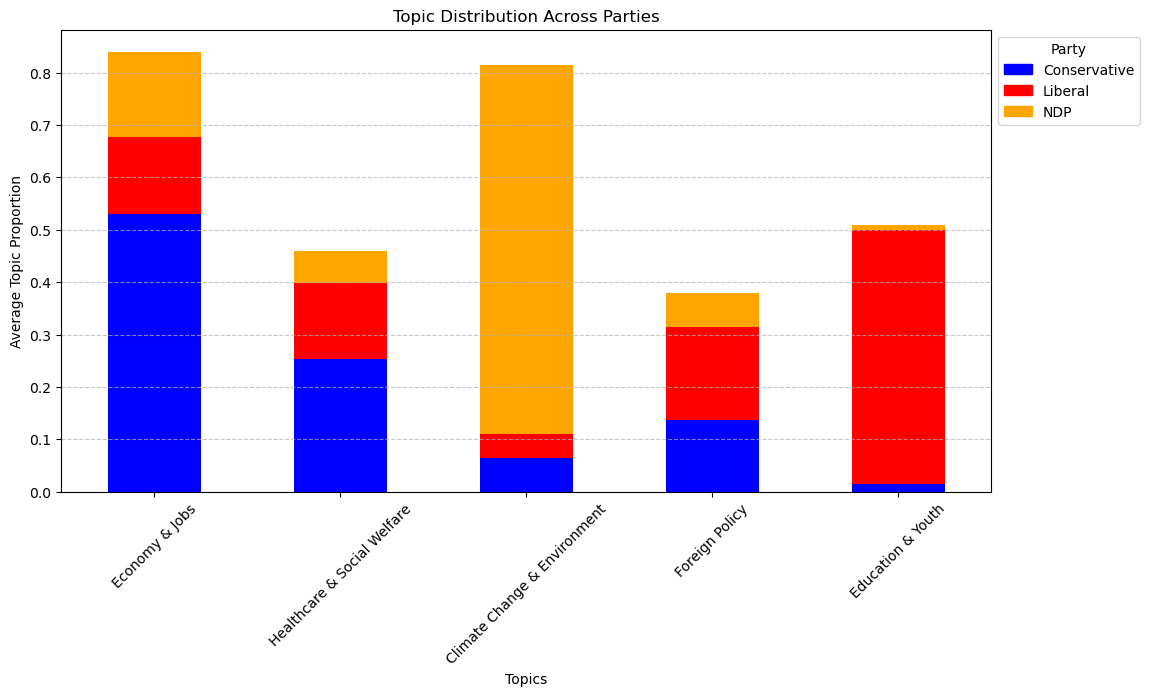

In [33]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation # Import LDA model
from sklearn.feature_extraction.text import CountVectorizer # Import CountVectorizer


# Define custom party colors
party_colors = {
    'Liberal': 'red',
    'NDP': 'orange',
    'Conservative': 'blue'
}

# Define custom topic names
custom_topic_names = {
    'Topic 1': 'Economy & Jobs',
    'Topic 2': 'Healthcare & Social Welfare',
    'Topic 3': 'Climate Change & Environment',
    'Topic 4': 'Foreign Policy',
    'Topic 5': 'Education & Youth'
}


# Preprocessing for LDA (if not already done)
def preprocess_text_lda(text):
    # Remove special characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())
    # Tokenize and remove stopwords
    words = [word for word in text.split() if word not in stop_words]
    return " ".join(words)  # Join words back into a string

df1['processed_content'] = df1['content'].apply(preprocess_text_lda)
df2['processed_content'] = df2['content'].apply(preprocess_text_lda)
df3['processed_content'] = df3['content'].apply(preprocess_text_lda)

# Create a CountVectorizer (if not already done)
vectorizer = CountVectorizer(max_features=1000)  # You can adjust max_features

# Fit and transform the data using CountVectorizer
all_text = pd.concat([df1['processed_content'], df2['processed_content'], df3['processed_content']])
vectorizer.fit(all_text)


# Assuming you want 5 topics
num_topics = 5

# Create and fit the LDA model
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(vectorizer.transform(all_text))



# Create a DataFrame to store topic distributions per party
df1_topics = pd.DataFrame(lda_model.transform(vectorizer.transform(df1['processed_content'])), columns=[f'Topic {i+1}' for i in range(num_topics)])
df1_topics['party'] = 'Liberal'

df2_topics = pd.DataFrame(lda_model.transform(vectorizer.transform(df2['processed_content'])), columns=[f'Topic {i+1}' for i in range(num_topics)])
df2_topics['party'] = 'NDP'

df3_topics = pd.DataFrame(lda_model.transform(vectorizer.transform(df3['processed_content'])), columns=[f'Topic {i+1}' for i in range(num_topics)])
df3_topics['party'] = 'Conservative'

# Combine all party topic distributions
all_parties_topics = pd.concat([df1_topics, df2_topics, df3_topics])

# Aggregate average topic proportions for each party
party_topic_distribution = all_parties_topics.groupby('party').mean()

# Rename topic columns based on custom topic names
party_topic_distribution.rename(columns=custom_topic_names, inplace=True)

# Plot the stacked bar chart with custom colors
fig, ax = plt.subplots(figsize=(12, 6))
party_topic_distribution.T.plot(kind='bar', stacked=True, color=[party_colors[party] for party in party_topic_distribution.index], ax=ax)

plt.title('Topic Distribution Across Parties')
plt.xlabel('Topics')
plt.ylabel('Average Topic Proportion')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a custom legend beside the chart
handles = [plt.Rectangle((0, 0), 1, 1, color=party_colors[party]) for party in party_topic_distribution.index]
labels = list(party_topic_distribution.index)
legend = plt.legend(handles, labels, title="Party", loc='upper left', bbox_to_anchor=(1, 1))  # Position legend beside

plt.show()

[nltk_data] Downloading package stopwords to C:\Users\Yathin
[nltk_data]     Muthavarapu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


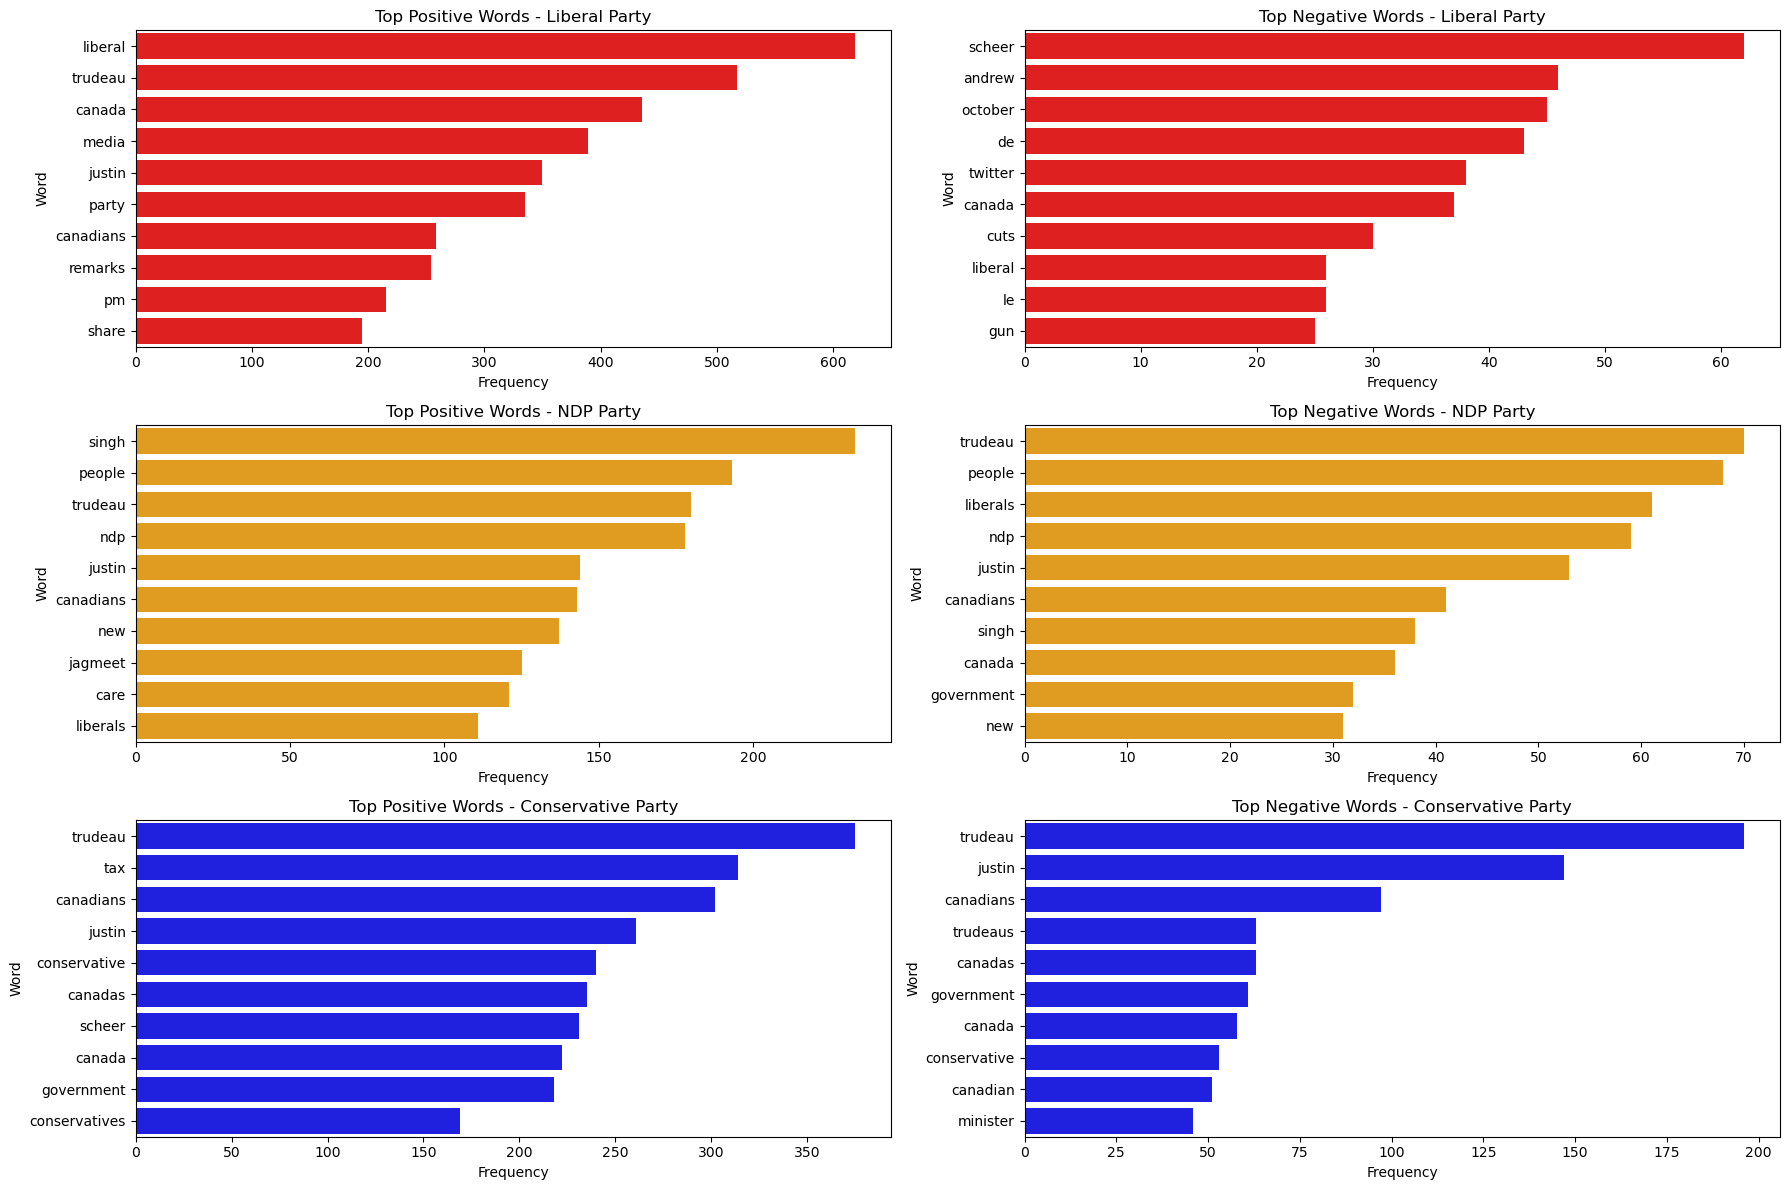

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re
from nltk.sentiment import SentimentIntensityAnalyzer  # Import SentimentIntensityAnalyzer


# Ensure stopwords are downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove special characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())
    # Tokenize and remove stopwords
    words = [word for word in text.split() if word not in stop_words]
    return words

# Apply preprocessing
df1['cleaned_words'] = df1['content'].apply(preprocess_text)
df2['cleaned_words'] = df2['content'].apply(preprocess_text)
df3['cleaned_words'] = df3['content'].apply(preprocess_text)


# Perform sentiment analysis and categorization for df1, df2, and df3
sia = SentimentIntensityAnalyzer()

def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

for df in [df1, df2, df3]:
    df['sentiment_scores'] = df['content'].apply(lambda x: sia.polarity_scores(x))
    df['compound_sentiment'] = df['sentiment_scores'].apply(lambda x: x['compound'])
    df['sentiment_category'] = df['compound_sentiment'].apply(categorize_sentiment) #add this line to apply sentiment scores to sentiment_category

# Function to get top words by sentiment category
def get_top_words(df, sentiment, n=10):
    words = [word for sublist in df[df['sentiment_category'] == sentiment]['cleaned_words'] for word in sublist]
    return Counter(words).most_common(n)

# Get top words for each sentiment
positive_words_df1 = get_top_words(df1, 'Positive')
negative_words_df1 = get_top_words(df1, 'Negative')
positive_words_df2 = get_top_words(df2, 'Positive')
negative_words_df2 = get_top_words(df2, 'Negative')
positive_words_df3 = get_top_words(df3, 'Positive')
negative_words_df3 = get_top_words(df3, 'Negative')

# Convert to DataFrame
pos_df1 = pd.DataFrame(positive_words_df1, columns=['Word', 'Frequency'])
neg_df1 = pd.DataFrame(negative_words_df1, columns=['Word', 'Frequency'])
pos_df2 = pd.DataFrame(positive_words_df2, columns=['Word', 'Frequency'])
neg_df2 = pd.DataFrame(negative_words_df2, columns=['Word', 'Frequency'])
pos_df3 = pd.DataFrame(positive_words_df3, columns=['Word', 'Frequency'])
neg_df3 = pd.DataFrame(negative_words_df3, columns=['Word', 'Frequency'])

# Plot the top keywords by sentiment
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
sns.barplot(x='Frequency', y='Word', data=pos_df1, ax=axes[0, 0], color='red')
axes[0, 0].set_title('Top Positive Words - Liberal Party')
sns.barplot(x='Frequency', y='Word', data=neg_df1, ax=axes[0, 1], color='red')
axes[0, 1].set_title('Top Negative Words - Liberal Party')
sns.barplot(x='Frequency', y='Word', data=pos_df2, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Top Positive Words - NDP Party')
sns.barplot(x='Frequency', y='Word', data=neg_df2, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Top Negative Words - NDP Party')
sns.barplot(x='Frequency', y='Word', data=pos_df3, ax=axes[2, 0], color='blue')
axes[2, 0].set_title('Top Positive Words - Conservative Party')
sns.barplot(x='Frequency', y='Word', data=neg_df3, ax=axes[2, 1], color='blue')
axes[2, 1].set_title('Top Negative Words - Conservative Party')

plt.tight_layout()
plt.show()

In [35]:
df1.head()

,party,url,content,date,cleaned_words,year_month,processed_content,sentiment_scores,compound_sentiment,sentiment_category
0,liberal,https://www.liberal.ca/gender-equality-week-st...,"\n\nShare\n\n\n\n\n\nToday, the Leader of the ...",2019-09-22,"[share, today, leader, liberal, party, canada,...",2019-09,share today leader liberal party canada justin...,"{'neg': 0.073, 'neu': 0.8, 'pos': 0.128, 'comp...",0.8979,Positive
1,liberal,https://www.liberal.ca/justin-trudeau-and-soph...,"\n\nShare\n\n\n\n\n\nSaguenay, QC – Justin Tru...",2018-06-13,"[share, saguenay, qc, justin, trudeau, leader,...",2018-06,share saguenay qc justin trudeau leader libera...,"{'neg': 0.015, 'neu': 0.833, 'pos': 0.152, 'co...",0.9788,Positive
2,liberal,https://www.liberal.ca/justin-trudeau-joins-su...,"\n\nShare\n\n\n\n\n\nCobourg, ON – Justin Trud...",2018-10-18,"[share, cobourg, justin, trudeau, join, local,...",2018-10,share cobourg justin trudeau join local libera...,"{'neg': 0.013, 'neu': 0.838, 'pos': 0.149, 'co...",0.9623,Positive
3,liberal,https://www.liberal.ca/liberals-nominate-rache...,"\n\nShare\n\n\n\n\n\nOutremont, QC- Local Libe...",2018-12-16,"[share, outremont, qc, local, liberals, outrem...",2018-12,share outremont qc local liberals outremont no...,"{'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'comp...",0.9943,Positive
4,liberal,https://www.liberal.ca/justin-trudeau-joins-su...,"\n\nShare\n\n\n\n\n\nOttawa, ON – Justin Trude...",2019-09-09,"[share, ottawa, justin, trudeau, join, chris, ...",2019-09,share ottawa justin trudeau join chris rodgers...,"{'neg': 0.015, 'neu': 0.824, 'pos': 0.161, 'co...",0.9552,Positive


### Twitter Data


In [37]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('Canadian_elections_2019.csv')
df

,sentiment,negative_reason,text
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ..."
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio..."
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO..."
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#..."
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h..."
...,...,...,...
2128,negative,Scandal,b'You know he was doing a good enough job smea...
2129,negative,Scandal,b'You missed the comment. Deflecting the issue...
2130,positive,NaN,b'Your daily reminder:\n@theJagmeetSingh endor...
2131,negative,Women Reproductive right and Racism,b'Yup...not going to reopen the abortion debat...


In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sentiment        2133 non-null   object
 1   negative_reason  1007 non-null   object
 2   text             2133 non-null   object
dtypes: object(3)
memory usage: 50.1+ KB


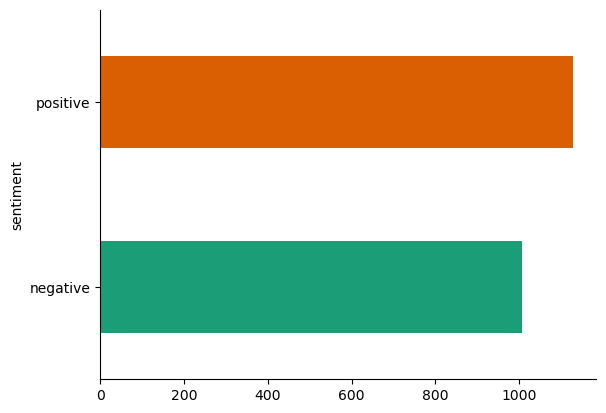

In [39]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [40]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re
import html
import unicodedata
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer# Define a function to clean the text

def textcleaning(text):

  # Define the stopwords
  stop = stopwords.words('english')

  # Remove all html tags and attributes
  text = BeautifulSoup(text).get_text()

  # Remove URLs and RTs
  text = re.sub(r'http\S+|RT @[\w_]+: ', '', text)

  # Remove hashtags and mentions
  text = re.sub(r"#(\w+)", '', text)
  text = re.sub('@([a-zA-Z0-9_]{1,50})', '', text)

  # Remove emoji
  emoji_pattern = re.compile("["
          u"\U0001F600-\U0001F64F"  # emoticons
          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
          u"\U0001F680-\U0001F6FF"  # transport & map symbols
          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
          u"\U0001F1F2-\U0001F1F4"  # Macau flag
          u"\U0001F1E6-\U0001F1FF"  # flags
          u"\U0001F600-\U0001F64F"
          u"\U00002702-\U000027B0"
          u"\U000024C2-\U0001F251"
          u"\U0001f926-\U0001f937"
          u"\U0001F1F2"
          u"\U0001F1F4"
          u"\U0001F620"
          u"\u200d"
          u"\u2640-\u2642"
          "]+", flags=re.UNICODE)

  text = emoji_pattern.sub(r'', text)

  # Make all characters in the text in lowercase
  text = text.lower()

  # Replace Html character codes (i.e., &...;) with an ASCII equivalent
  text = html.unescape(text)
  text = unicodedata.normalize('NFKD',text).encode('ascii','ignore').decode('ascii')

  # Remove punctuations
  text = text.replace("'", '')
  text = re.sub('[^A-Za-z0-9]+', ' ', text)

  # Remove stop words
  text = " ".join([word for word in text.split() if not word in stop])

  # Lemmatize words
  lemmatizer = WordNetLemmatizer()
  text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])

  return text

[nltk_data] Downloading package stopwords to C:\Users\Yathin
[nltk_data]     Muthavarapu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Yathin
[nltk_data]     Muthavarapu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Yathin
[nltk_data]     Muthavarapu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
# Copy the original data set
df_copy = df.copy()

# Apply the cleaning function to the original data set and give the cleaned data
df_copy['text'] = df['text'].apply(textcleaning)
df_copy

,sentiment,negative_reason,text
0,negative,Women Reproductive right and Racism,b instead suggestion agree trust government pr...
1,positive,NaN,b real n n
2,negative,Economy,b going cost 94 billion next 4 year ask justin
3,positive,NaN,b n n ncant decide help n n
4,negative,Economy,b sick tired hard earned donated corporate wel...
...,...,...,...
2128,negative,Scandal,byou know good enough job smearing campaign ri...
2129,negative,Scandal,byou missed comment deflecting issue answer be...
2130,positive,NaN,byour daily reminder n endorses strategic voti...
2131,negative,Women Reproductive right and Racism,byup going reopen abortion debate xf0 x9f x98 ...


In [42]:
def clean_text(text):
    if isinstance(text, str):  # Ensure the value is a string
        text = re.sub(r'\bb', '', text)  # Remove standalone 'b' at word boundaries
        text = re.sub(r'\bn\b', '', text)  # Remove 'n' at word boundaries
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply the function to your DataFrame column
df_copy['text'] = df_copy['text'].apply(clean_text)

# Display cleaned data
print(df_copy['text'].head())

0    instead suggestion agree trust government prot...
1                                                 real
2          going cost 94 illion next 4 year ask justin
3                                    ncant decide help
4    sick tired hard earned donated corporate welfa...
Name: text, dtype: object


In [43]:
# Define a function that exstract hashtags and mentions
def election_h_m(election_related_data):

  # Extract the hashtags and mentions for each tweets
  df['hashtag'] = df['text'].apply(lambda x: re.findall(r"#(\w+)", x))
  df['mentions'] = df['text'].apply(lambda x: re.findall("@([a-zA-Z0-9_]{1,50})", x))

  # Extract all hashtags
  hashtag_list = []
  for i in range(df.shape[0]):
    for j in range(len(df['hashtag'][i])):
      hashtag_list.append(df['hashtag'][i][j])

  # Extract all mentions
  mention_list = []
  for i in range(df.shape[0]):
    for j in range(len(df['mentions'][i])):
      mention_list.append(df['mentions'][i][j])

  return df, hashtag_list, mention_list

In [44]:
# Organiaze the list of unique hashtags and mentions
unique_hashtag = pd.unique(election_h_m(df)[1])
unique_mention = pd.unique(election_h_m(df)[2])

In [45]:
df['clean_text'] = df_copy['text']
df.head()

,sentiment,negative_reason,text,hashtag,mentions,clean_text
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","[Canadian, women, AndrewScheer, Conservatives,...",[RosieBarton],instead suggestion agree trust government prot...
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...","[AllWomanSpacewalk, EtobicokeNorth, CityofTO, ...",[Space_Station],real
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","[Brantford, elxn43, cdnpoli, Canada]",[],going cost 94 illion next 4 year ask justin
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...","[Canada, CanadaElection2019, CanadaVotes, elxn43]",[],ncant decide help
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","[Canada, taxpayers, TrudeauMustGo, Canada, SNC...","[SNCLavalin, Sheila_Copps]",sick tired hard earned donated corporate welfa...


In [46]:
# Define the keywords for each party based on the list of unique hashtags and mentions
liberal_keywords = ['VoteLiberal', 'IStandWithTrudeau', 'VoteLiberalMajority',
                    'ForwardForEveryone', 'LiberalMajority','ChooseForward','TrudeauMustWin',
                    'lpc', 'trudeau', 'istandWithTrudeau', 'Trudeau','Justin','justin','trudeau',
                   'liberal', 'forwardforevertyone', 'voteliberalmajority',
                   'voteliberal', 'liveralmajority', 'JustinTrudeau', 'liberal_party']

conservarive_keywords = ['OToole', 'OTooleForPM', 'Conservative','Conservatives','AndrewScheer', 'CPC', 'VoteConservative',
                        'conservative', 'otooleforpm', 'cpc', 'votecpc4canada', 'otoole', 'voteconservative',
                        'erinotoole', 'CPC_HQ']

ppc_keywords = ['VotePPC', 'PPC', 'ppc', 'VotePPC2021', 'PurpleWave', 'PPCcandidate', 'MaximeBernier',
               'Bernier', 'bernier', 'voteppc2021', 'ppccandidate', 'voteppc', 'ppc2021', 'maximebernierforpm',
               'maximebernierpm','CanadianSovereignty','PPCstrong']

ndp_keywords = ["Singh", "NDP", 'VoteNDP', 'NDP2021', 'Democratic Party', 'theJagmeetSingh','JagmeetSingh','Jagmeet' ,'ndp', 'GoJameet', 'Vote4Phil',
               'DurhamNDP', 'paultaylorto', 'NewDemocrats', 'NewDemocratsParty','ndp2021','NewDemocraticParty']
     

In [47]:
# Define the function to determine the political party for the tweets with hashtags or mentions
def political_party(df):

    # Define a function to check if there is any element in a string list appears in the hashtags
    def any_string_in_hashtag(str_lst, i):
        target_hashtag = df['hashtag'][i]
        for string in str_lst:
            if string in target_hashtag:
                return True
        return False

    # Define a function to check if there is any element in a string list appears in the mentions
    def any_string_in_mention(str_lst, i):
        target_mention = df['mentions'][i]
        for string in str_lst:
            if string in target_mention:
                return True
        return False

    # Add a new column party
    df['party'] = ''
    # Add a new column that indicates whether the tweet has party (removed later)
    df['withparty'] = False

    # Check the keywords from hashtags and mentions
    for i in range(df.shape[0]):

        # Assign the party of each tweet as a list
        df.at[i, 'party'] = []

        # Check hashtags and add the possible party into its list
        if any_string_in_hashtag(ppc_keywords, i):
            df.at[i, 'party'].append("The People's Party of Canada (PPC)")

        if any_string_in_hashtag(liberal_keywords, i):
            df.at[i, 'party'].append('Liberal')

        if any_string_in_hashtag(conservarive_keywords, i):
            df.at[i, 'party'].append('Conservative')

        if any_string_in_hashtag(ndp_keywords, i):
            df.at[i, 'party'].append('New Democratic Party (NDP)')

        # Check mentions and add the possible party into its list
        if any_string_in_mention(liberal_keywords, i):
            df.at[i, 'party'].append('Liberal')

        if any_string_in_mention(conservarive_keywords, i):
            df.at[i, 'party'].append('Conservative')

        if any_string_in_mention(ndp_keywords, i):
            df.at[i, 'party'].append('New Democratic Party (NDP)')

        if any_string_in_mention(ppc_keywords, i):
            df.at[i, 'party'].append("The People's Party of Canada (PPC)")

        # Return True if the length of the list of party is not 0
        df.at[i, 'withparty'] = len(df.at[i, 'party']) != 0

    return df

In [48]:
# Apply the political party procedure and we will get parties from some tweets
election_withparty = political_party(df)

# Exstract the data set with party
election_party = election_withparty[election_withparty['withparty']]

In [49]:
# Define a function to count the times of the elements in a string list appears in the texts
def string_text(str_lst, text):
    count = 0
    for string in str_lst:
        if string in text:
            count += 1
    return count

# Reassign party for tweet that the length of party list is bigger than 1
for i in election_party['party'].keys():
    # Remove repeat parties
    #Check if it's a list and has more than one element to apply pd.unique
    if isinstance(election_party['party'][i], list) and len(election_party['party'][i]) > 1:
        # Instead of assigning a list, assign the first unique party
        election_party.loc[i, 'party'] = pd.unique(election_party['party'][i])[0]

    # Instead of checking length, check if it's a list
    if isinstance(election_party['party'][i], list) and len(election_party['party'][i]) == 1: #Check if it's a list before checking its length
        election_party.loc[i, 'party'] = election_party['party'][i][0] # Use .loc for assignment

    if isinstance(election_party['party'][i], list) and len(election_party['party'][i]) > 1: #Check if it's a list before checking its length
        # Count the times that different party keywords appear in each tweet
        lib_count = string_text(liberal_keywords, election_party['text'][i])
        con_count = string_text(conservarive_keywords, election_party['text'][i])
        ppc_count = string_text(ppc_keywords, election_party['text'][i])
        ndp_count = string_text(ndp_keywords, election_party['text'][i])

        # Compute the max keywords appearing count
        max_count = max([lib_count, con_count, ppc_count, ndp_count])

        # Reassign party using .loc for assignment
        if max_count == con_count:
            election_party.loc[i, 'party'] = 'Conservative'
        if max_count == lib_count:
            election_party.loc[i, 'party'] = 'Liberal'
        if max_count == ppc_count:
            election_party.loc[i, 'party'] = "The People's Party of Canada (PPC)"
        if max_count == ndp_count:
            election_party.loc[i, 'party'] = 'New Democratic Party (NDP)'
    election_withparty.loc[i, 'party'] = election_party.loc[i, 'party'] # Use .loc for assignment

# Assign the party for the tweet that doesn't have party as 'NaN'
for k in range(election_withparty.shape[0]):
    if isinstance(election_withparty['party'][k], list):
        election_withparty.loc[k, 'party'] = 'NaN' # Use .loc for assignment

In [50]:
df

,sentiment,negative_reason,text,hashtag,mentions,clean_text,party,withparty
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","[Canadian, women, AndrewScheer, Conservatives,...",[RosieBarton],instead suggestion agree trust government prot...,Conservative,True
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...","[AllWomanSpacewalk, EtobicokeNorth, CityofTO, ...",[Space_Station],real,NaN,False
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","[Brantford, elxn43, cdnpoli, Canada]",[],going cost 94 illion next 4 year ask justin,NaN,False
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...","[Canada, CanadaElection2019, CanadaVotes, elxn43]",[],ncant decide help,NaN,False
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","[Canada, taxpayers, TrudeauMustGo, Canada, SNC...","[SNCLavalin, Sheila_Copps]",sick tired hard earned donated corporate welfa...,NaN,False
...,...,...,...,...,...,...,...,...
2128,negative,Scandal,b'You know he was doing a good enough job smea...,"[cdnpoli, elxn43]",[AndrewScheer],you know good enough job smearing campaign rig...,Conservative,True
2129,negative,Scandal,b'You missed the comment. Deflecting the issue...,"[cdnpoli, elxn2019, elxn43, CanadaVotes]","[kinsellawarren, CPC_HQ]",you missed comment deflecting issue answer est...,Conservative,True
2130,positive,NaN,b'Your daily reminder:\n@theJagmeetSingh endor...,"[elxn43, elxn2019, CDNpoli, LPC, NDP, GPC]",[theJagmeetSingh],your daily reminder endorses strategic voting,New Democratic Party (NDP),True
2131,negative,Women Reproductive right and Racism,b'Yup...not going to reopen the abortion debat...,"[elxn43, ScheerLies, ScheerHypocrisy]",[],yup going reopen abortion debate xf0 x9f x98 x8f,NaN,False


In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sentiment        2133 non-null   object
 1   negative_reason  1007 non-null   object
 2   text             2133 non-null   object
 3   hashtag          2133 non-null   object
 4   mentions         2133 non-null   object
 5   clean_text       2133 non-null   object
 6   party            2133 non-null   object
 7   withparty        2133 non-null   bool  
dtypes: bool(1), object(7)
memory usage: 118.9+ KB


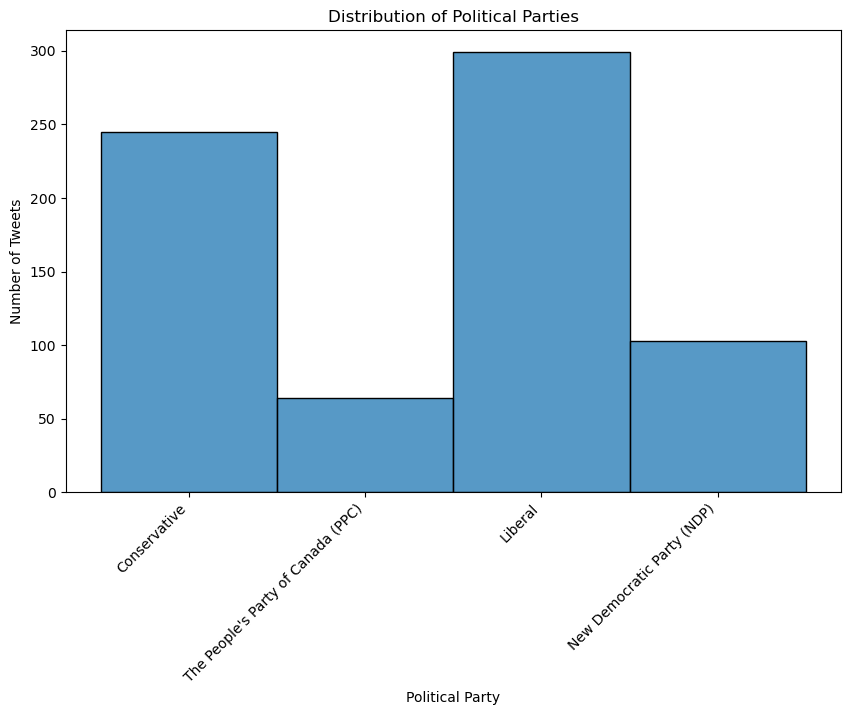

In [52]:
df['party'] = df['party'].astype(str)

# Drop rows with 'NaN' values in the 'party' column
df_cleaned = df.dropna(subset=['party'])

# Filter out empty strings in the 'party' column
df_cleaned = df_cleaned[(df_cleaned['party'] != 'nan') & (df_cleaned['party'] != 'NaN')]

plt.figure(figsize=(10, 6))
# Plot the histogram using the cleaned DataFrame
sns.histplot(df_cleaned['party'], kde=False)
plt.title('Distribution of Political Parties')
plt.xlabel('Political Party')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45, ha='right')
plt.show()

In [53]:
# Table of the distribution of the political affiliations of the tweets
party_tab = pd.DataFrame({'Party': df['party'].value_counts().index, 'Count': df['party'].value_counts().values})
party_tab.style.set_table_attributes("style='display:inline'").set_caption('The distribution table of the political affiliations of the tweets')

,Party,Count
0,NaN,1422
1,Liberal,299
2,Conservative,245
3,New Democratic Party (NDP),103
4,The People's Party of Canada (PPC),64


In [54]:
df_clean = df[df['withparty'] == True][['sentiment', 'party', 'clean_text', 'negative_reason']]
df_clean['source'] = 'Twitter'
df_clean

,sentiment,party,clean_text,negative_reason,source
0,negative,Conservative,instead suggestion agree trust government prot...,Women Reproductive right and Racism,Twitter
5,negative,Conservative,fact 2012 introduced end long gun registry eve...,Others,Twitter
6,positive,The People's Party of Canada (PPC),rocky dong hand est election video ever please...,NaN,Twitter
9,negative,Liberal,nlets see receipt pay warren kinsella make sle...,Scandal,Twitter
14,negative,Conservative,run deep w crazed anti trudeau fixation orderi...,Others,Twitter
...,...,...,...,...,...
2124,negative,Conservative,you vote dishonest slandering politician alway...,Tell lies,Twitter
2128,negative,Conservative,you know good enough job smearing campaign rig...,Scandal,Twitter
2129,negative,Conservative,you missed comment deflecting issue answer est...,Scandal,Twitter
2130,positive,New Democratic Party (NDP),your daily reminder endorses strategic voting,NaN,Twitter


In [55]:
df_clean.to_csv('df_clean.csv', encoding='utf-8-sig', index=False)

In [56]:
import pandas as pd

# Load the CSV (if not already loaded)
df_X = pd.read_csv("df_clean.csv")  # Update path if needed

# Calculate null values count and percentage
null_counts = df.isnull().sum()
null_percent = (null_counts / len(df)) * 100

# Combine into a summary DataFrame
null_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Percentage (%)': null_percent.round(2)
})

# Display the result
print(null_summary)

                 Null Count  Percentage (%)
sentiment                 0            0.00
negative_reason        1126           52.79
text                      0            0.00
hashtag                   0            0.00
mentions                  0            0.00
clean_text                0            0.00
party                     0            0.00
withparty                 0            0.00


In [57]:
df_X.head()

,sentiment,party,clean_text,negative_reason,source
0,negative,Conservative,instead suggestion agree trust government prot...,Women Reproductive right and Racism,Twitter
1,negative,Conservative,fact 2012 introduced end long gun registry eve...,Others,Twitter
2,positive,The People's Party of Canada (PPC),rocky dong hand est election video ever please...,NaN,Twitter
3,negative,Liberal,nlets see receipt pay warren kinsella make sle...,Scandal,Twitter
4,negative,Conservative,run deep w crazed anti trudeau fixation orderi...,Others,Twitter


In [58]:
# See sentiment distribution for null vs non-null negative_reason
print(df_X[df_X['negative_reason'].isnull()]['sentiment'].value_counts())
print(df_X[df_X['negative_reason'].notnull()]['sentiment'].value_counts())

sentiment
positive    354
Name: count, dtype: int64
sentiment
negative    356
positive      1
Name: count, dtype: int64


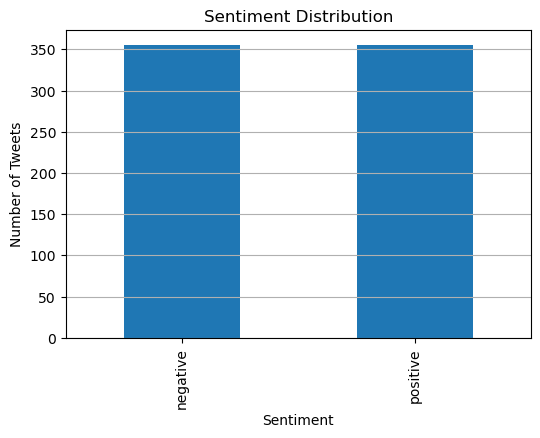

In [59]:
import matplotlib.pyplot as plt

# 1. Sentiment distribution
sentiment_counts = df_X['sentiment'].value_counts()

plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.grid(axis='y')
plt.show()

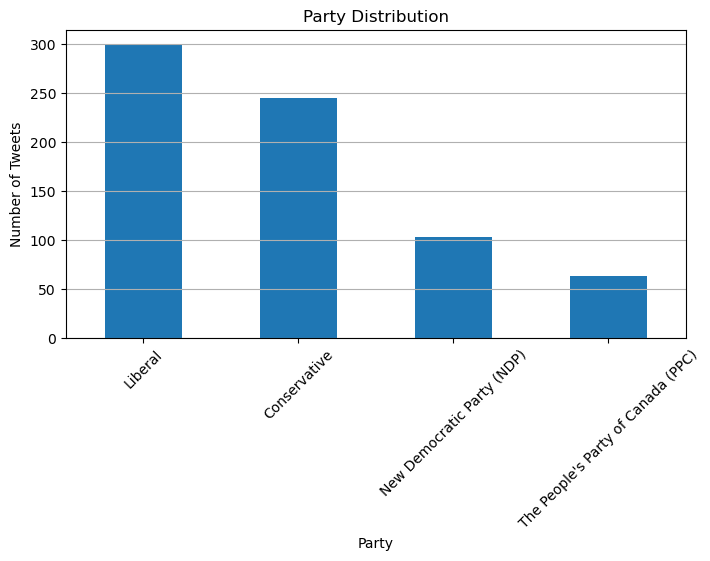

In [60]:
# 2. Party distribution
party_counts = df_X['party'].value_counts()

plt.figure(figsize=(8,4))
party_counts.plot(kind='bar')
plt.title('Party Distribution')
plt.xlabel('Party')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

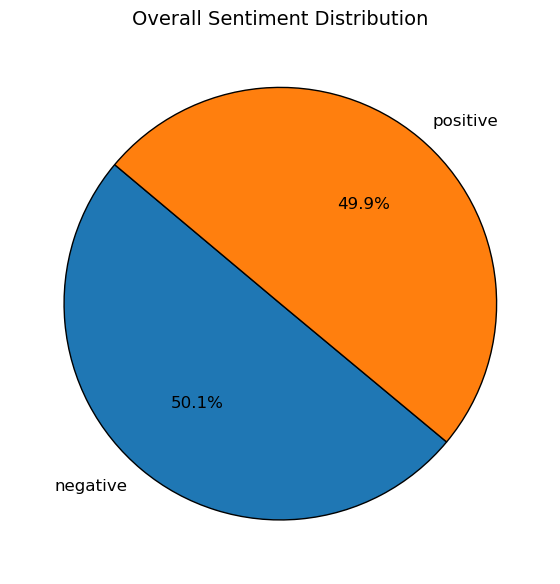

In [61]:
import matplotlib.pyplot as plt

# Set a nicer font size and style for presentation
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 14, 'axes.labelsize': 12})

# 1. Sentiment distribution - pie chart for visual impact
sentiment_counts = df_X['sentiment'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140,
        wedgeprops={'edgecolor': 'black'})
plt.title('Overall Sentiment Distribution')
plt.tight_layout()
plt.show()

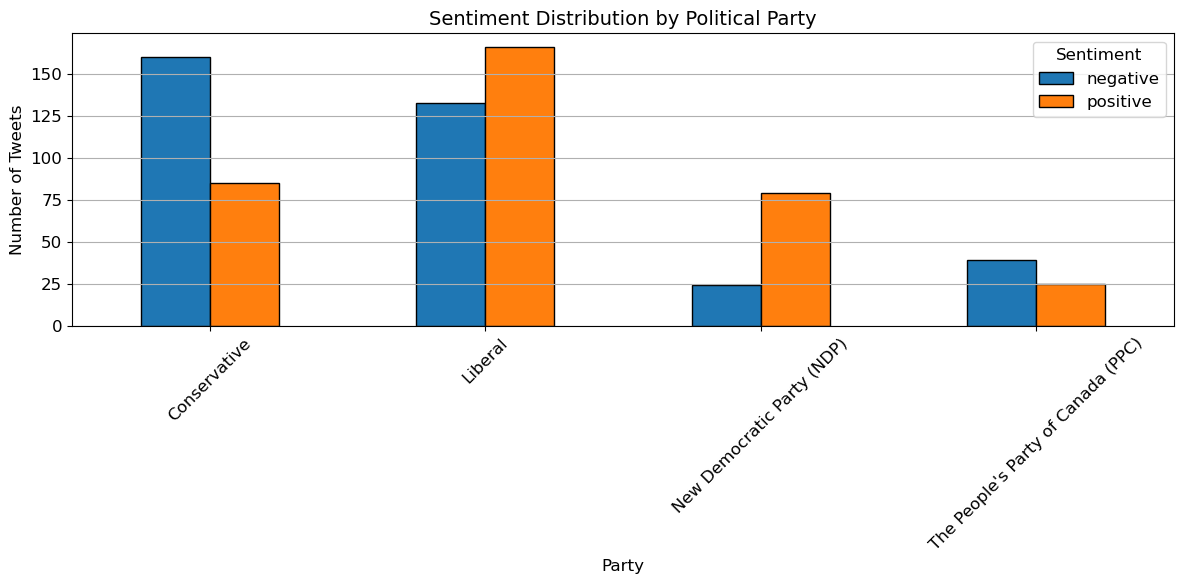

In [62]:
# 3. Sentiment by Party - grouped bar chart (not stacked for clarity)
sentiment_party = df_X.groupby(['party', 'sentiment']).size().unstack(fill_value=0)
sentiment_party.plot(kind='bar', figsize=(12,6), edgecolor='black')
plt.title('Sentiment Distribution by Political Party')
plt.xlabel('Party')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

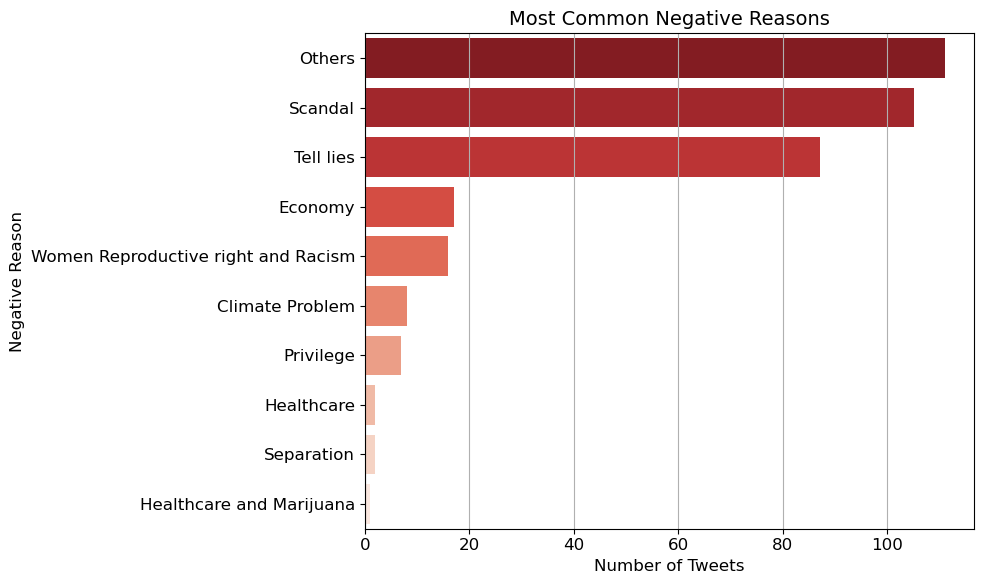

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only negative tweets with non-null reasons
neg_df = df_X[(df_X['sentiment'] == 'negative') & (df_X['negative_reason'].notnull())]

# Count of each negative reason
reason_counts = neg_df['negative_reason'].value_counts()

# Plot: Horizontal bar chart
plt.figure(figsize=(10,6))
sns.barplot(y=reason_counts.index, x=reason_counts.values, palette='Reds_r')
plt.title('Most Common Negative Reasons')
plt.xlabel('Number of Tweets')
plt.ylabel('Negative Reason')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

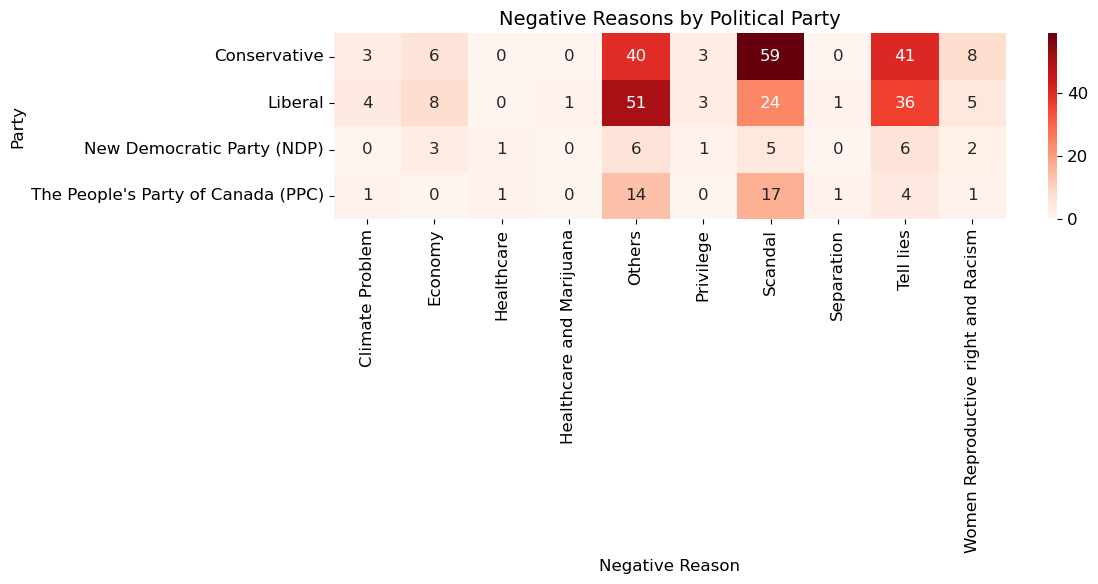

In [64]:
# Plot 2: Heatmap of Negative Reasons by Party
reason_party = neg_df.groupby(['party', 'negative_reason']).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(reason_party, annot=True, fmt='d', cmap='Reds')
plt.title('Negative Reasons by Political Party')
plt.xlabel('Negative Reason')
plt.ylabel('Party')
plt.tight_layout()
plt.show()

In [65]:
# Function to clean text
def clean_text(text):
    if pd.isnull(text):
        return ""  # Return empty string for NaN values

    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\b(?:x[a-fA-F0-9]{1,})\b', '', text)  # Remove "xf0", "xe2", "x99", etc.
    text = re.sub(r'\b[a-f0-9]{2,}\b', '', text)  # Remove standalone hex codes
    text = re.sub(r'[^a-z\s]', '', text)  # Keep only letters and spaces
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words (1-2 letters)
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces

    return text

# Apply cleaning to the 'clean_text' column
df_X['clean_text'] = df_X['clean_text'].apply(clean_text)

# Verify the cleaned text
print(df_X[['clean_text']].head(10))

                                          clean_text
0  instead suggestion agree trust government prot...
1  fact introduced end long gun registry even tho...
2  rocky dong hand est election video ever please...
3  nlets see receipt pay warren kinsella make sleaze
4  run deep crazed anti trudeau fixation ordering...
5  history answering embarrassing question one wo...
6  policy comment illegal immoral nefarious activ...
7  isnt fit hold public office let alone ncanadia...
8  province issue many cant wait send packing monday
9  using dodgeball ndodge dip duck dive dodge nit...


[nltk_data] Downloading package stopwords to C:\Users\Yathin
[nltk_data]     Muthavarapu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


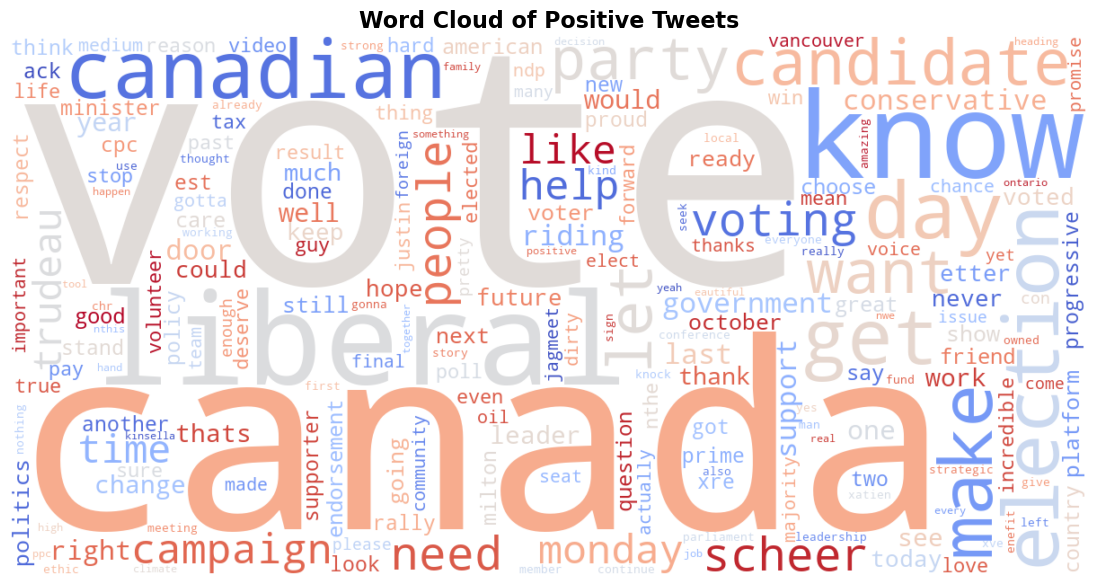

In [66]:
from wordcloud import WordCloud
from collections import Counter
import string
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Ensure stopwords are downloaded
nltk.download('stopwords')
custom_stopwords = set(stopwords.words('english'))

# 1. Filter positive tweets
pos_df = df_X[df_X['sentiment'] == 'positive']

# 2. Combine all positive tweet text
positive_text = " ".join(pos_df['clean_text'].dropna().astype(str))

# 3. Convert to lowercase
positive_text = positive_text.lower()

# 4. Remove stopwords
words = [word for word in positive_text.split() if word not in custom_stopwords]

# 5. Count word frequencies
word_freq = Counter(words)

# 6. Generate word cloud
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='coolwarm',  # Better contrast
    max_words=200
).generate_from_frequencies(word_freq)

# 7. Plot
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Positive Tweets", fontsize=16, fontweight='bold')
plt.show()

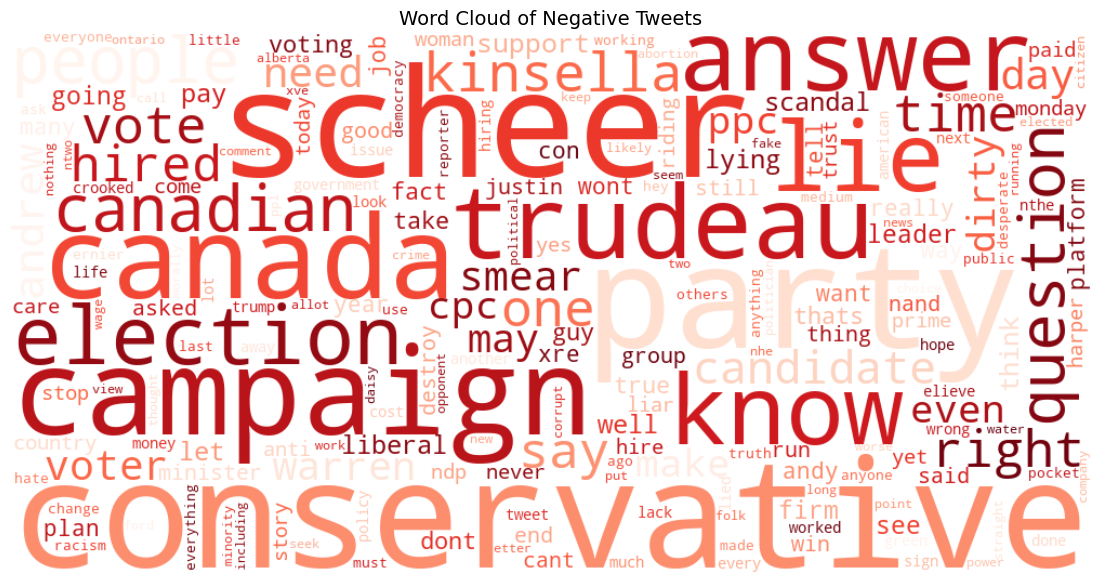

In [67]:
from wordcloud import WordCloud
from collections import Counter
import string
import re
import matplotlib.pyplot as plt

# 1. Filter negative tweets
neg_df = df_X[df_X['sentiment'] == 'negative']

# 2. Combine all negative tweet text
negative_text = " ".join(neg_df['clean_text'].dropna().astype(str))

# 3. Clean text: remove punctuation, lowercase, remove short words
negative_text_clean = re.sub(r'\b\w{1,2}\b', '', negative_text)  # remove short words
negative_text_clean = negative_text_clean.translate(str.maketrans('', '', string.punctuation)).lower()

# 4. Remove stopwords
stopwords = set(WordCloud().stopwords)
neg_words = [word for word in negative_text_clean.split() if word not in stopwords]

# 5. Count word frequencies
neg_word_freq = Counter(neg_words)

# 6. Generate word cloud
neg_wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='Reds'  # red = heat, frustration
).generate_from_frequencies(neg_word_freq)

# 7. Plot
plt.figure(figsize=(12,6))
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Negative Tweets")
plt.tight_layout()
plt.show()


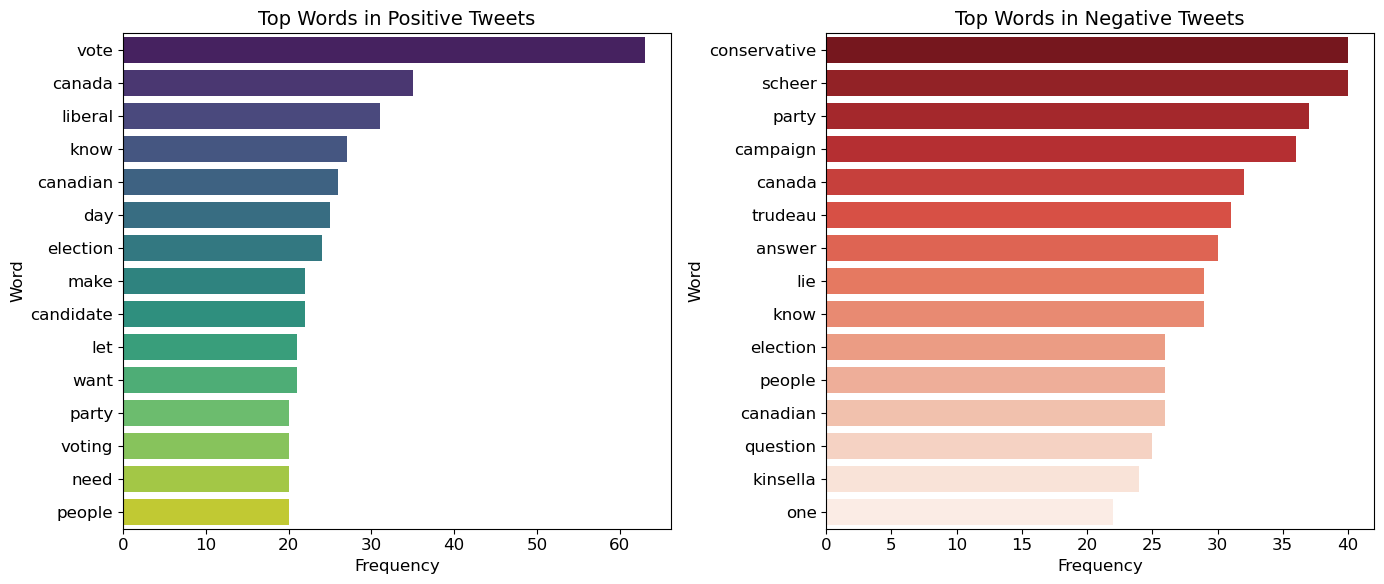

In [68]:
from collections import Counter
import re
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define stopwords
stopwords = set(WordCloud().stopwords)

# Function to get top N words for a given sentiment
def get_top_words_by_sentiment(dataframe, sentiment_label, n=15):
    text = " ".join(dataframe[dataframe['sentiment'] == sentiment_label]['clean_text'].dropna().astype(str))
    text = re.sub(r'\b\w{1,2}\b', '', text)  # remove short words
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    words = [word for word in text.split() if word not in stopwords]
    return Counter(words).most_common(n)

# Get top words per sentiment
top_positive_words = get_top_words_by_sentiment(df_X, 'positive')
top_negative_words = get_top_words_by_sentiment(df_X, 'negative')

# Convert to DataFrames for plotting
top_pos_df = pd.DataFrame(top_positive_words, columns=['Word', 'Frequency'])
top_neg_df = pd.DataFrame(top_negative_words, columns=['Word', 'Frequency'])

# Plot side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Positive words
sns.barplot(ax=axes[0], data=top_pos_df, x='Frequency', y='Word', palette='viridis')
axes[0].set_title('Top Words in Positive Tweets')

# Negative words
sns.barplot(ax=axes[1], data=top_neg_df, x='Frequency', y='Word', palette='Reds_r')
axes[1].set_title('Top Words in Negative Tweets')

plt.tight_layout()
plt.show()

In [69]:
import pandas as pd
# Combine data from different dataframes
combined_df = pd.DataFrame()

# Function to combine data
def combine_data(df, party_name):
    temp_df = pd.DataFrame({
        'text': df['processed_content'],  # Use processed_content
        'party_name': party_name,
        'sentiment': df['sentiment_category'] # Use sentiment_category
    })
    return temp_df

# Combine data
combined_df = pd.concat([
    combine_data(df1, 'Liberal'),
    combine_data(df2, 'New Democratic Party (NDP)'),
    combine_data(df3, 'Conservative')
])

# Add data from df_X
df_x_combined = pd.DataFrame({
    'text': df_X['clean_text'],
    'party_name': df_X['party'],
    'sentiment': df_X['sentiment']
})
combined_df = pd.concat([combined_df, df_x_combined], ignore_index = True)
print(combined_df.head())


                                                text party_name sentiment
0  share today leader liberal party canada justin...    Liberal  Positive
1  share saguenay qc justin trudeau leader libera...    Liberal  Positive
2  share cobourg justin trudeau join local libera...    Liberal  Positive
3  share outremont qc local liberals outremont no...    Liberal  Positive
4  share ottawa justin trudeau join chris rodgers...    Liberal  Positive


In [70]:
combined_df['sentiment']=combined_df['sentiment'].replace({'Positive':'positive','Negative':'negative','Neutral':'neutral'})

In [71]:
sentiment_counts = combined_df['sentiment'].value_counts()
sentiment_counts

sentiment
positive    765
negative    444
neutral       4
Name: count, dtype: int64

In [72]:

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load dataset (replace with actual file)
df = combined_df  # Ensure this file has "text", "party_name", "sentiment" columns

# Function to clean text
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters & numbers
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words (1-2 letters)
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)

# Encode categorical labels
label_enc_party = LabelEncoder()
label_enc_sentiment = LabelEncoder()

df['party_encoded'] = label_enc_party.fit_transform(df['party_name'])
df['sentiment_encoded'] = label_enc_sentiment.fit_transform(df['sentiment'])

# Save encoders for later use
joblib.dump(label_enc_party, "party_label_encoder.pkl")
joblib.dump(label_enc_sentiment, "sentiment_label_encoder.pkl")

# Define features (X) and target labels (y)
X = df['clean_text']
y = df[['party_encoded', 'sentiment_encoded']]

# Convert text into numerical format (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features for efficiency
X_tfidf = vectorizer.fit_transform(X)

# Save TF-IDF vectorizer for later use
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

print("Data preprocessing completed successfully!")

[nltk_data] Downloading package stopwords to C:\Users\Yathin
[nltk_data]     Muthavarapu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data preprocessing completed successfully!


In [73]:
# Train a MultiOutput Classifier using Random Forest
multi_clf = MultiOutputClassifier(RandomForestClassifier(n_estimators=200, random_state=42))
multi_clf.fit(X_train, y_train)

# Save the trained model
joblib.dump(multi_clf, "multi_output_classifier.pkl")

print("Model training completed and saved successfully!")

Model training completed and saved successfully!


In [74]:
def predict_party_and_sentiment(user_text):
    # Load saved model and encoders
    model = joblib.load("multi_output_classifier.pkl")
    tfidf_vectorizer = joblib.load("tfidf_vectorizer.pkl")
    label_enc_party = joblib.load("party_label_encoder.pkl")
    label_enc_sentiment = joblib.load("sentiment_label_encoder.pkl")

    # Clean user input text
    cleaned_text = clean_text(user_text)

    # Convert text to TF-IDF features
    text_vectorized = tfidf_vectorizer.transform([cleaned_text])

    # Predict party and sentiment
    party_pred, sentiment_pred = model.predict(text_vectorized)[0]

    # Convert numerical predictions back to labels
    predicted_party = label_enc_party.inverse_transform([party_pred])[0]
    predicted_sentiment = label_enc_sentiment.inverse_transform([sentiment_pred])[0]

    return predicted_party, predicted_sentiment

# Example usage
user_input = "Poilievre lays out his plan to deal with Trump and help Canada weather the tariff storm Conservative leader says his election campaign won't be about the U.S. threat alone"
predicted_party, predicted_sentiment = predict_party_and_sentiment(user_input)

print(f"Predicted Party: {predicted_party}")
print(f"Predicted Sentiment: {predicted_sentiment}")

Predicted Party: Conservative
Predicted Sentiment: positive


In [75]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = multi_clf.predict(X_test)

# Convert predictions to DataFrame for comparison
y_pred_df = pd.DataFrame(y_pred, columns=['party_pred', 'sentiment_pred'])
y_test_df = y_test.reset_index(drop=True)

# Evaluate model performance
print("Party Name Prediction Report:")
print(classification_report(y_test_df['party_encoded'], y_pred_df['party_pred']))

print("Sentiment Prediction Report:")
print(classification_report(y_test_df['sentiment_encoded'], y_pred_df['sentiment_pred']))


Party Name Prediction Report:
              precision    recall  f1-score   support

           0       0.65      0.71      0.68        95
           1       0.67      0.76      0.71        97
           2       1.00      0.68      0.81        41
           3       1.00      0.10      0.18        10

    accuracy                           0.70       243
   macro avg       0.83      0.56      0.60       243
weighted avg       0.73      0.70      0.69       243

Sentiment Prediction Report:
              precision    recall  f1-score   support

           0       0.68      0.37      0.48        97
           1       1.00      1.00      1.00         1
           2       0.68      0.88      0.77       145

    accuracy                           0.68       243
   macro avg       0.79      0.75      0.75       243
weighted avg       0.68      0.68      0.65       243



In [76]:

from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
import joblib

# Train XGBoost model for multi-output classification
xgb_model = MultiOutputClassifier(XGBClassifier(n_estimators=200, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss', random_state=42))

xgb_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(xgb_model, "xgboost_multi_output.pkl")

print("XGBoost model trained and saved successfully!")

joblib.dump(X_test, "X_test_tfidf.pkl")  # Save TF-IDF representation of X_test
joblib.dump(y_test, "y_test.pkl")       # Save y_test

print("XGBoost model and test data saved successfully!")

XGBoost model trained and saved successfully!
XGBoost model and test data saved successfully!


In [77]:
def predict_party_and_sentiment_xgb(user_text):
    # Load saved model and encoders
    model = joblib.load("xgboost_multi_output.pkl")
    tfidf_vectorizer = joblib.load("tfidf_vectorizer.pkl")
    label_enc_party = joblib.load("party_label_encoder.pkl")
    label_enc_sentiment = joblib.load("sentiment_label_encoder.pkl")

    # Clean user input text
    cleaned_text = clean_text(user_text)

    # Convert text to TF-IDF features
    text_vectorized = tfidf_vectorizer.transform([cleaned_text])

    # Predict party and sentiment
    party_pred, sentiment_pred = model.predict(text_vectorized)[0]

    # Convert numerical predictions back to labels
    predicted_party = label_enc_party.inverse_transform([party_pred])[0]
    predicted_sentiment = label_enc_sentiment.inverse_transform([sentiment_pred])[0]

    return predicted_party, predicted_sentiment

# Example usage
user_input = "Poilievre lays out his plan to deal with Trump and help Canada weather the tariff storm Conservative leader says his election campaign won't be about the U.S. threat alone"
predicted_party, predicted_sentiment = predict_party_and_sentiment_xgb(user_input)

print(f"Predicted Party: {predicted_party}")
print(f"Predicted Sentiment: {predicted_sentiment}")

Predicted Party: Conservative
Predicted Sentiment: positive


In [78]:
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load saved model
xgb_model = joblib.load("xgboost_multi_output.pkl")

X_test_tfidf = joblib.load("X_test_tfidf.pkl")  # Ensure you saved X_test's TF-IDF representation
y_test = joblib.load("y_test.pkl")  # Ensure you saved y_test properly

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_tfidf)

# Evaluate accuracy for both sentiment and party prediction
party_accuracy_xgb = accuracy_score(y_test.iloc[:, 0], y_pred_xgb[:, 0])
sentiment_accuracy_xgb = accuracy_score(y_test.iloc[:, 1], y_pred_xgb[:, 1])

print(f"Sentiment Prediction Accuracy (XGBoost): {sentiment_accuracy_xgb:.4f}")
print(f"Party Prediction Accuracy (XGBoost): {party_accuracy_xgb:.4f}")

# Display classification reports
print("\n Party Classification Report:")
print(classification_report(y_test.iloc[:, 0], y_pred_xgb[:, 0]))

print("\n Sentiment Classification Report:")
print(classification_report(y_test.iloc[:, 1], y_pred_xgb[:, 1]))

Sentiment Prediction Accuracy (XGBoost): 0.7037
Party Prediction Accuracy (XGBoost): 0.6955

 Party Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.65      0.69        95
           1       0.68      0.79      0.73        97
           2       0.76      0.71      0.73        41
           3       0.12      0.10      0.11        10

    accuracy                           0.70       243
   macro avg       0.58      0.56      0.57       243
weighted avg       0.69      0.70      0.69       243


 Sentiment Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.44      0.55        97
           1       0.00      0.00      0.00         1
           2       0.70      0.88      0.78       145

    accuracy                           0.70       243
   macro avg       0.47      0.44      0.44       243
weighted avg       0.70      0.70      0.68       243

